<a href="https://colab.research.google.com/github/nagikomo/forex-trading/blob/main/dqn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Google ドライブをマウントするには、このセルを実行してください。
from google.colab import drive
drive.mount('/content/drive')

%cd drive/My Drive

Mounted at /content/drive
/content/drive/My Drive


In [2]:
from importlib import import_module
import imp
import tensorflow as tf
import numpy as np
import gc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from IPython.display import clear_output

np.set_printoptions(threshold=np.inf)

In [3]:
%cd /content/drive/My Drive/fxrl/

agent_name = "qrdqn"
agent = import_module(f"rl.agent.{agent_name}")

n = 1
pip_scale = 1
batch_size = 2056
model_name = "efficientnet_b0"
s = 5

self = agent.Agent(model_name, s, action_type=3, pip_scale=pip_scale, n=n, loss_cut=False, use_device="tpu", dueling=False)

/content/drive/.shortcut-targets-by-id/1X1mPU_qjjT5iTqENogJWput8PpyviByt/fxrl
INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.40.20.122:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.40.20.122:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


[2, 3]
[0.1, 0.0, 0.1, 0.1]
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 30, 2)]           0         
                                                                 
 gaussian_noise (GaussianNoi  (None, 30, 2)            0         
 se)                                                             
                                                                 
 conv1d (Conv1D)             (None, 30, 16)            176       
                                                                 
 mb_block (MBBlock)          (None, 30, 16)            804       
                                                                 
 activation_6 (Activation)   (None, 30, 16)            32        
                                                                 
 conv1d_3 (Conv1D)           (None, 30, 24)            408       
                                 

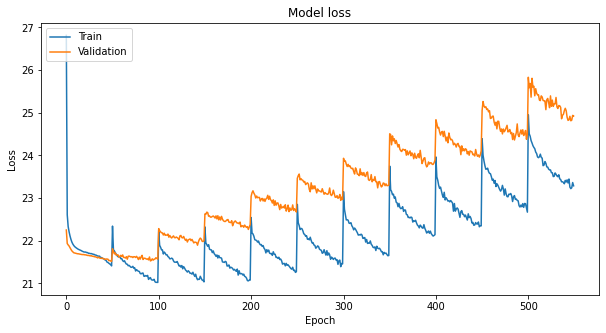

5/5 [==============================] - 0s 27ms/step - loss: 29.0486


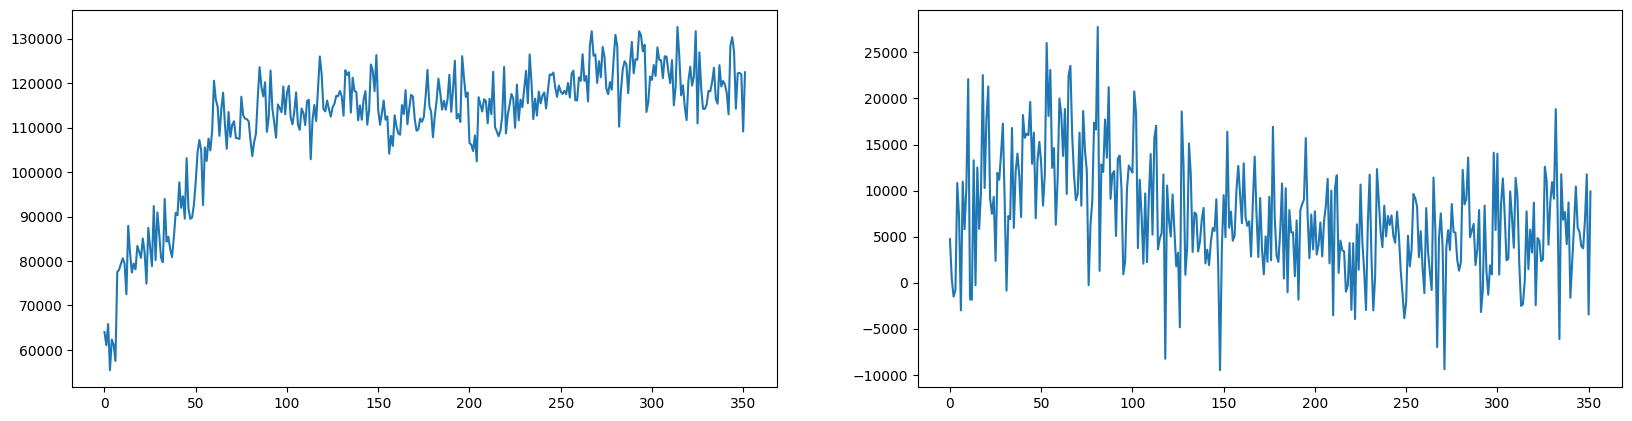

profits = 1.57907, max profits = 18.72754
pips = 107.40750050832985, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 24.8326


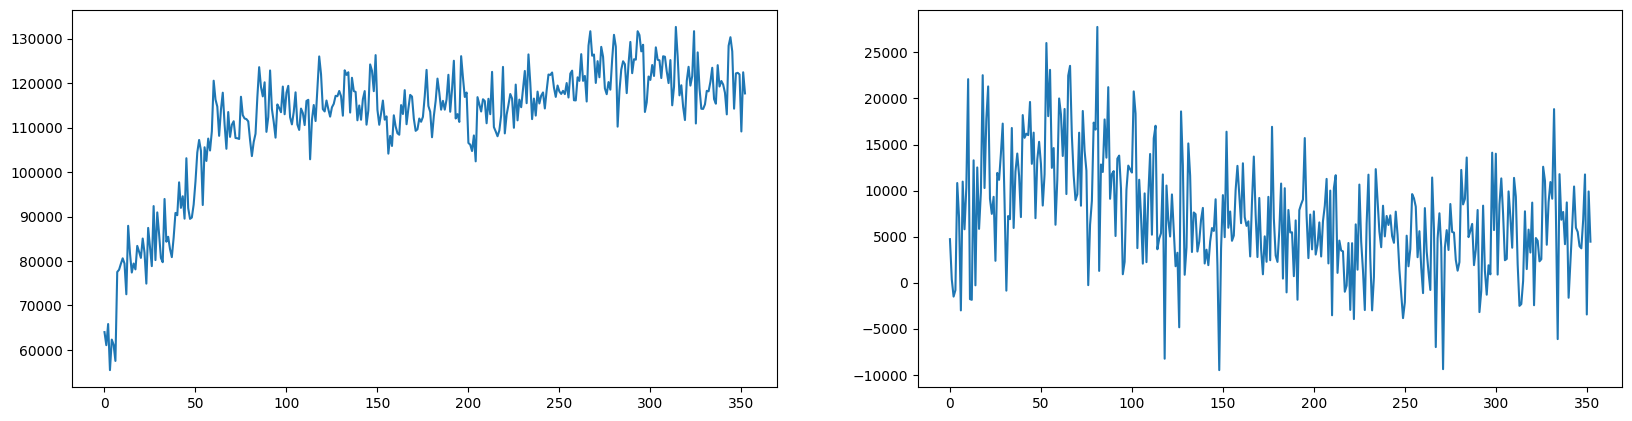

profits = 1.04492, max profits = 18.72754
pips = 74.15048804215368, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 24.5620


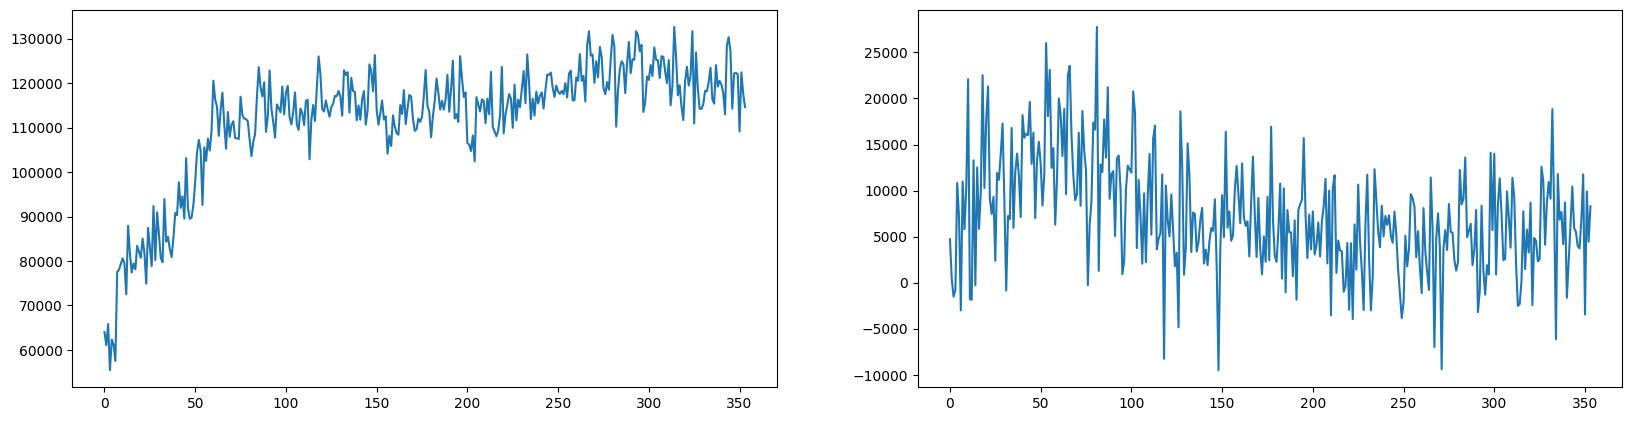

profits = 1.5593, max profits = 18.72754
pips = 128.88922567976635, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 24.6163


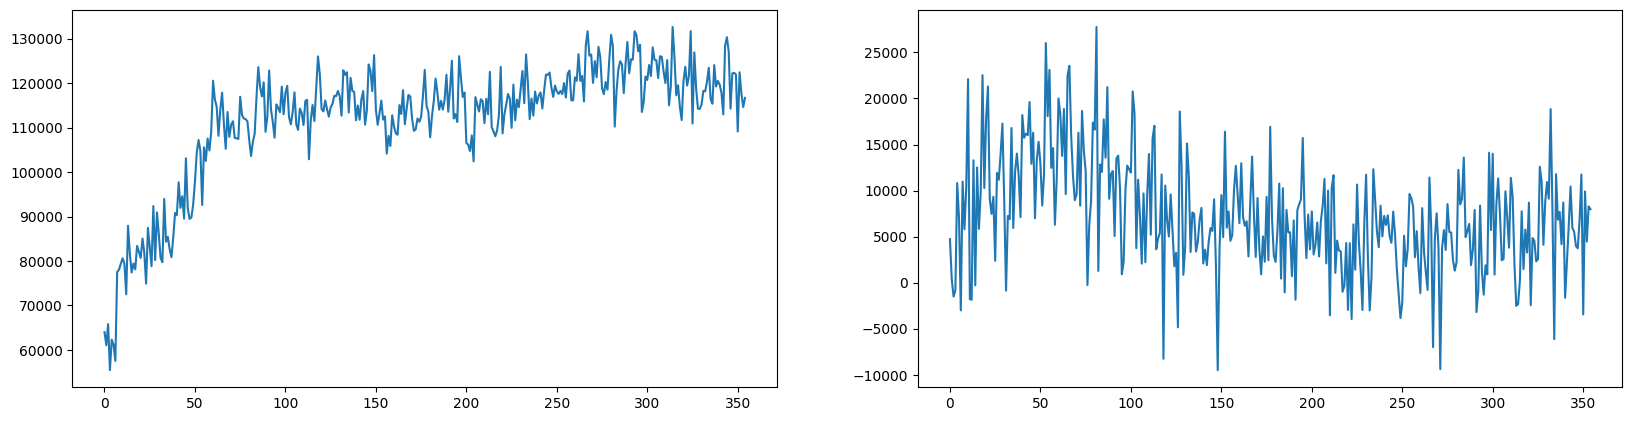

profits = 1.50429, max profits = 18.72754
pips = 149.62995032841653, max pip = 260.5742292917815
5/5 [==============================] - 0s 29ms/step - loss: 24.6372


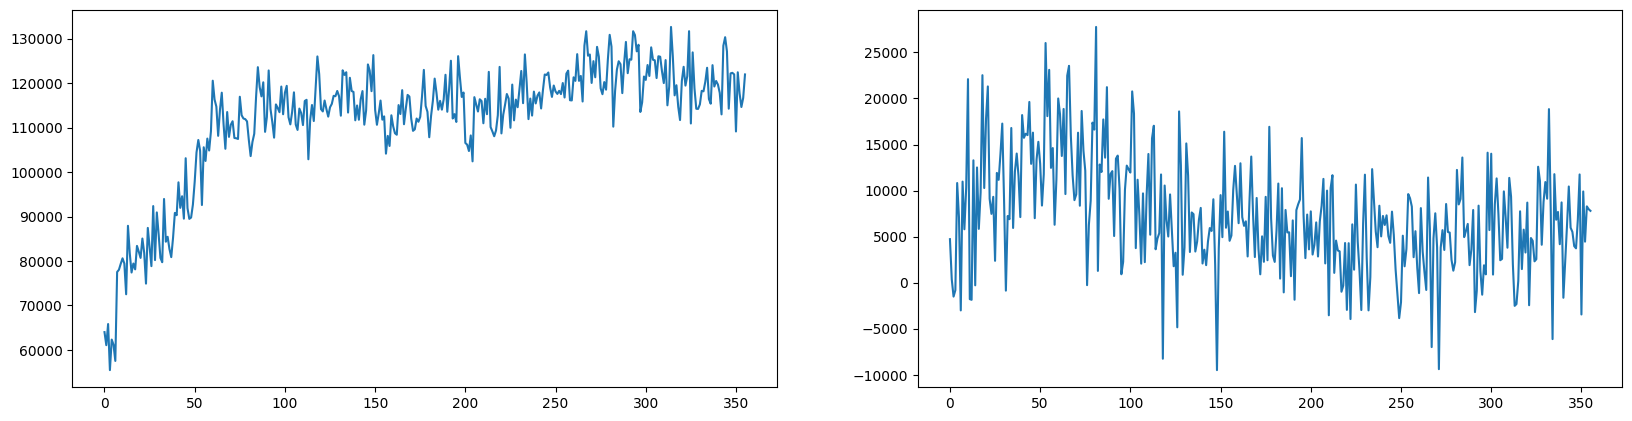

profits = 1.41675, max profits = 18.72754
pips = 121.76890562117272, max pip = 260.5742292917815
5/5 [==============================] - 0s 29ms/step - loss: 24.4661


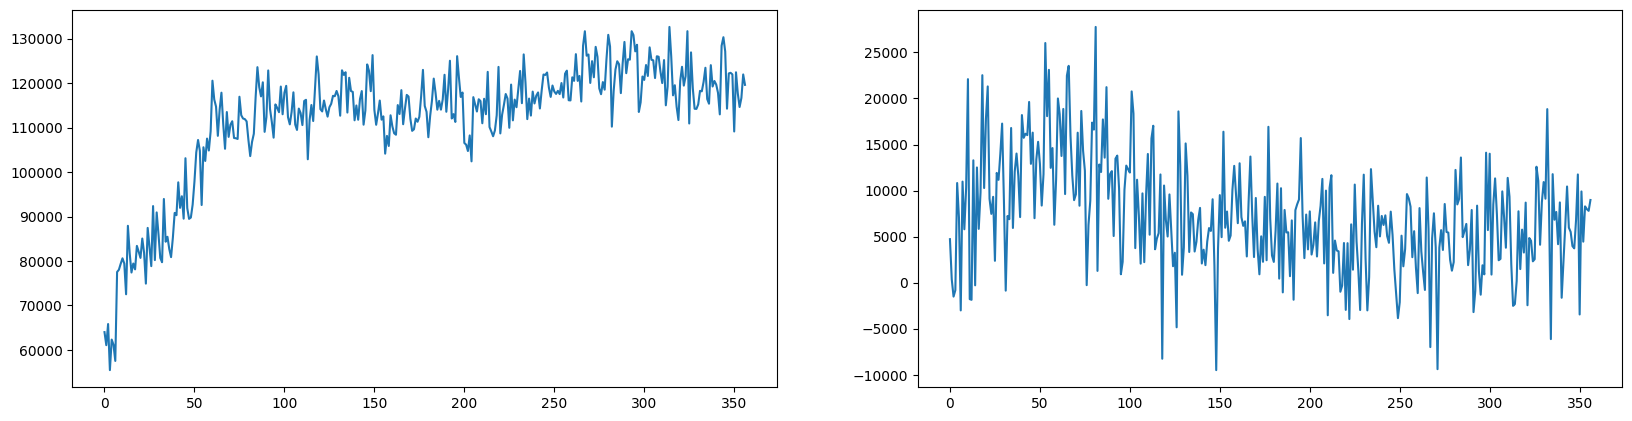

profits = 1.23178, max profits = 18.72754
pips = 128.55686609359952, max pip = 260.5742292917815
5/5 [==============================] - 0s 29ms/step - loss: 24.4033


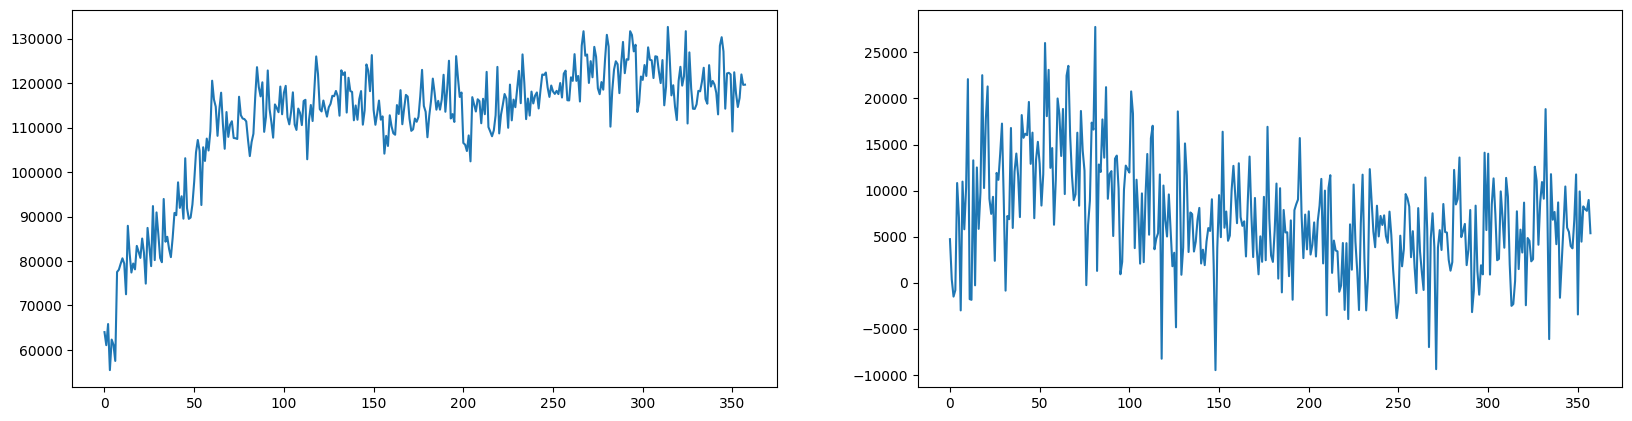

profits = 1.10399, max profits = 18.72754
pips = 92.77812929258266, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 24.3990


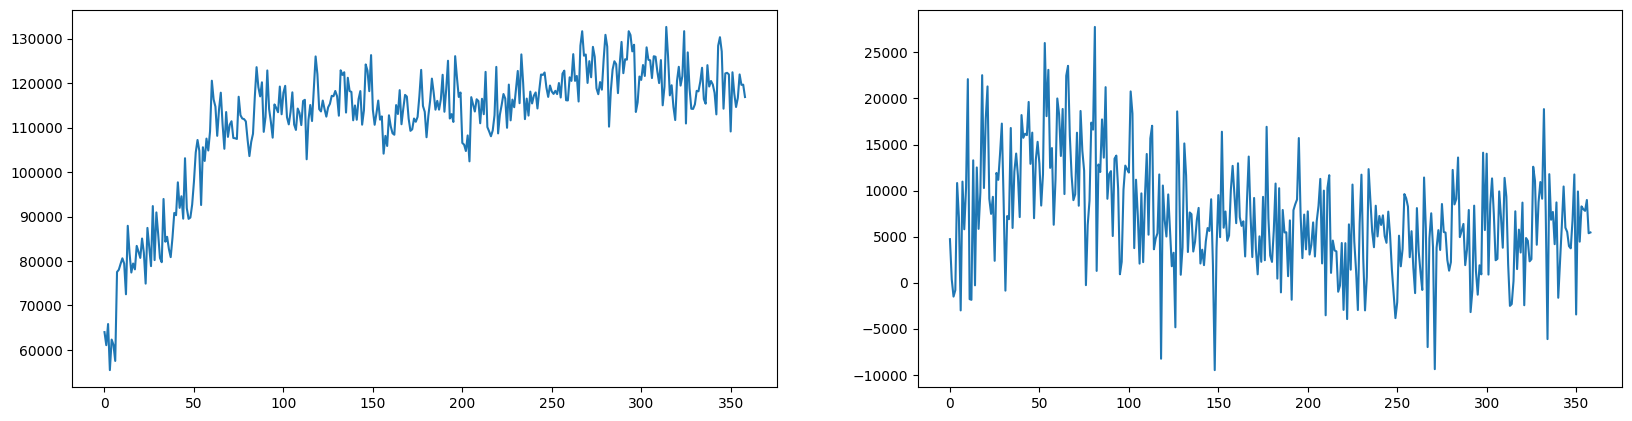

profits = 1.04665, max profits = 18.72754
pips = 79.22917882572663, max pip = 260.5742292917815
5/5 [==============================] - 0s 26ms/step - loss: 24.0680


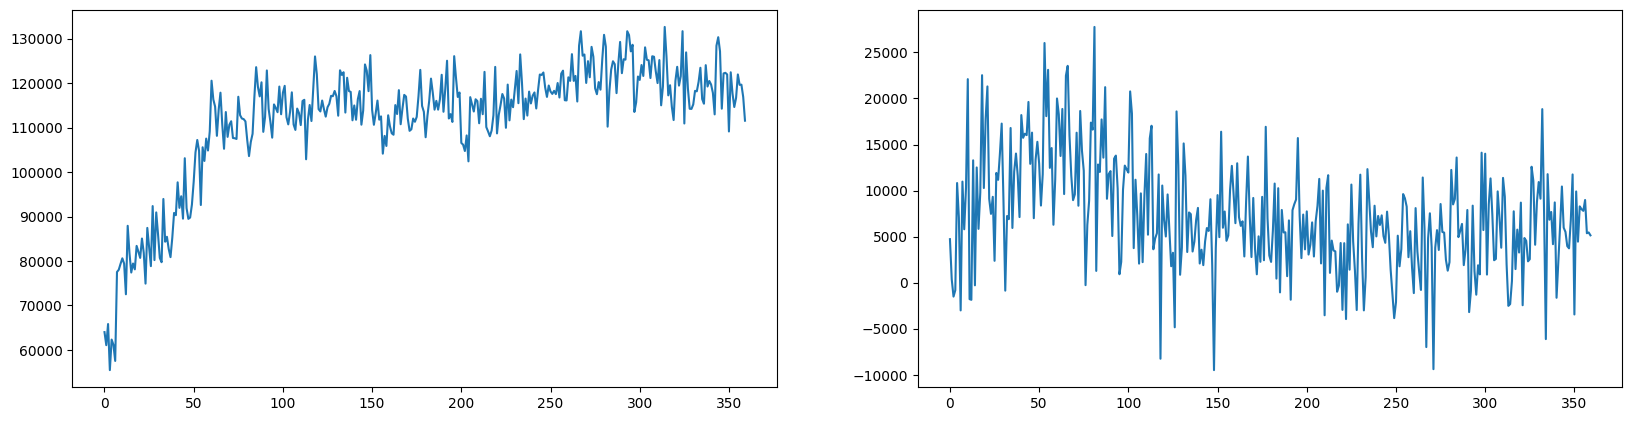

profits = 1.04766, max profits = 18.72754
pips = 97.50987933634669, max pip = 260.5742292917815
5/5 [==============================] - 0s 30ms/step - loss: 24.2613


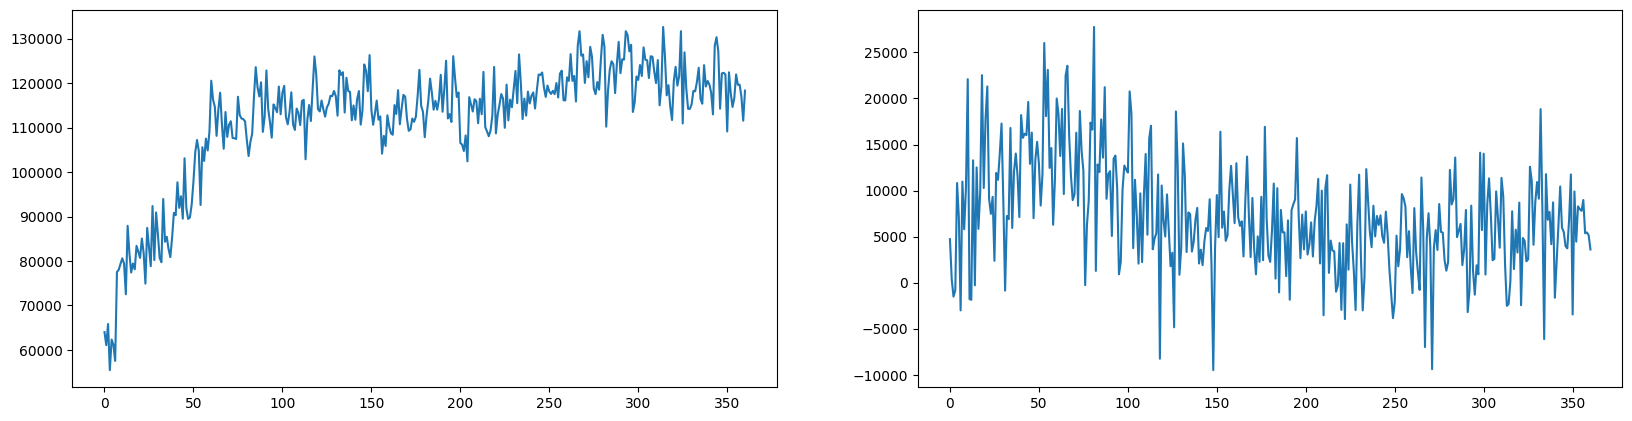

profits = 1.16004, max profits = 18.72754
pips = 93.81621314347507, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 24.5172


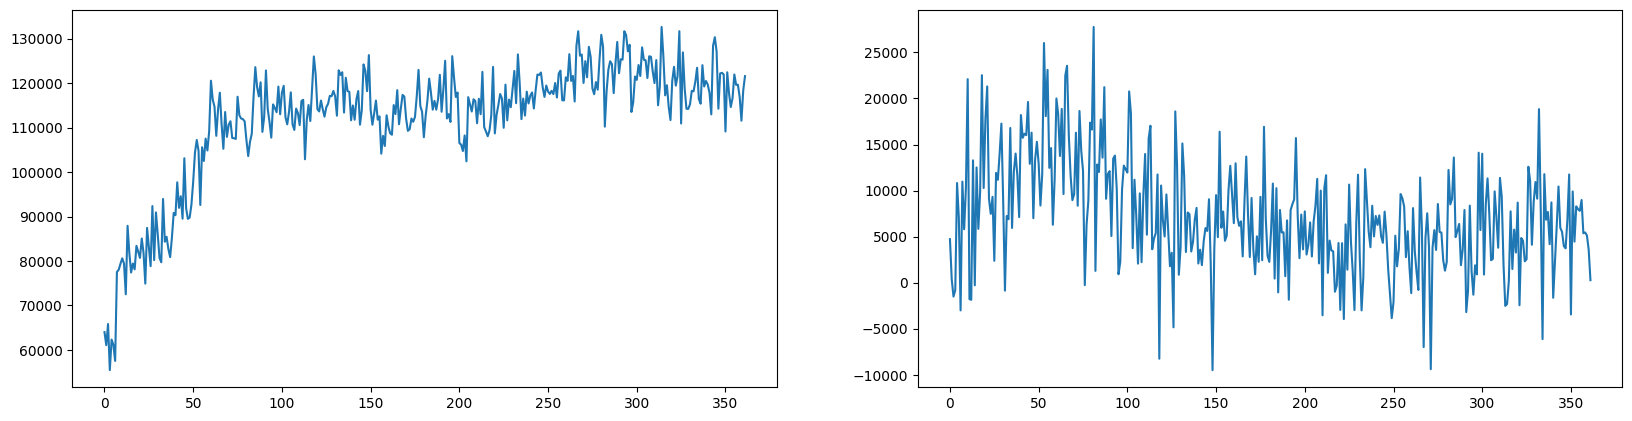

profits = 1.02754, max profits = 18.72754
pips = 63.29350146231244, max pip = 260.5742292917815
5/5 [==============================] - 0s 29ms/step - loss: 24.2556


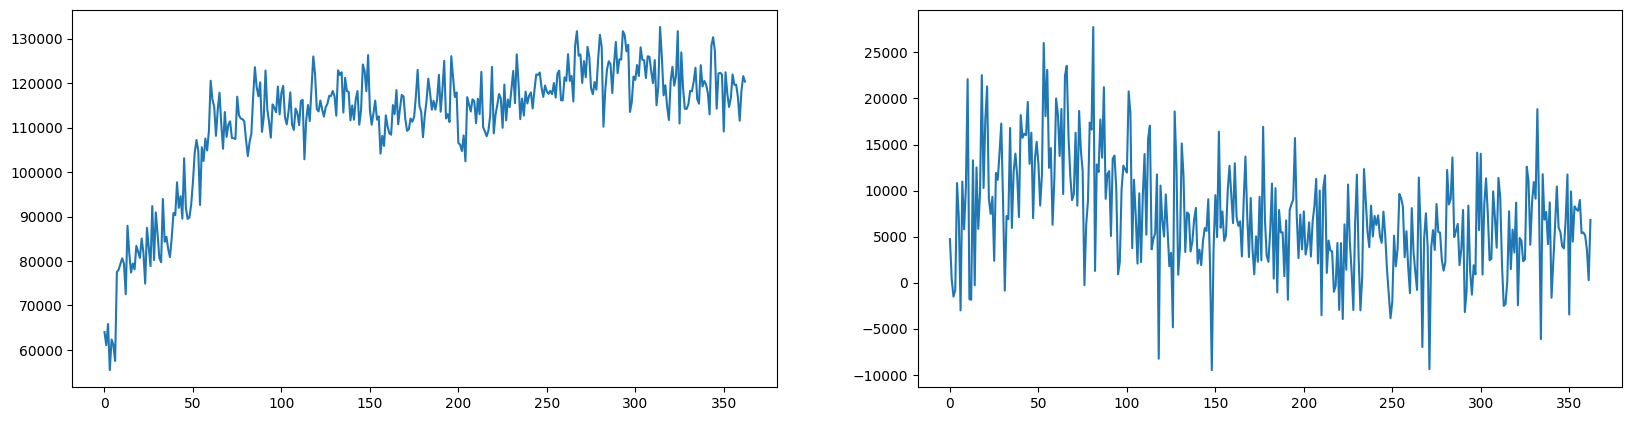

profits = 1.04665, max profits = 18.72754
pips = 97.6600284650956, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 24.2281


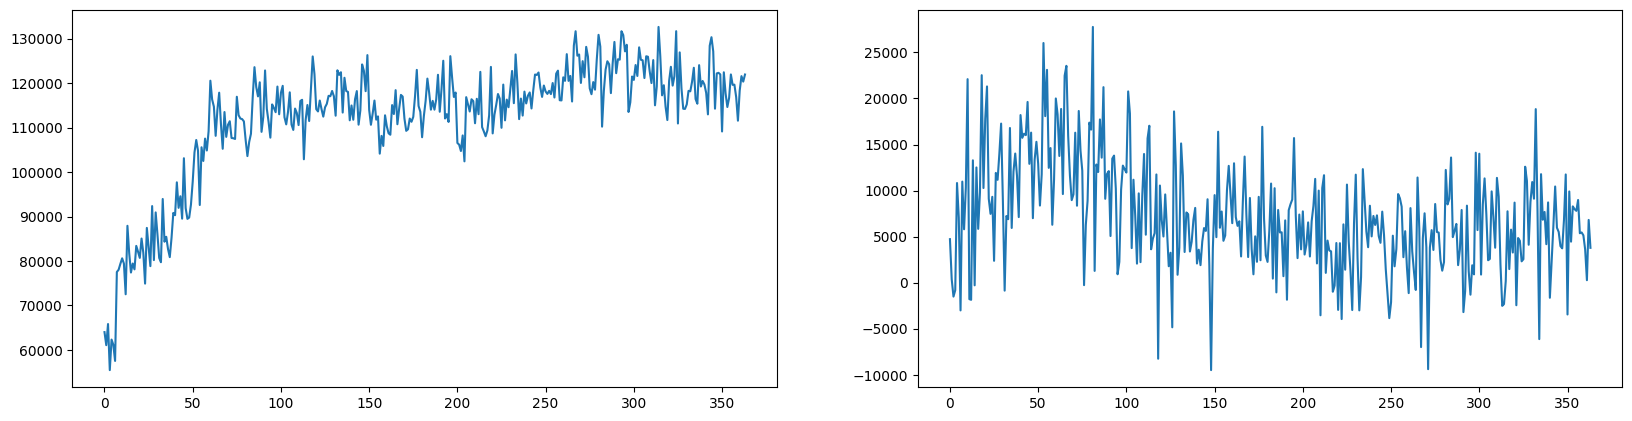

profits = 1.02754, max profits = 18.72754
pips = 105.95178608441118, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 24.2093


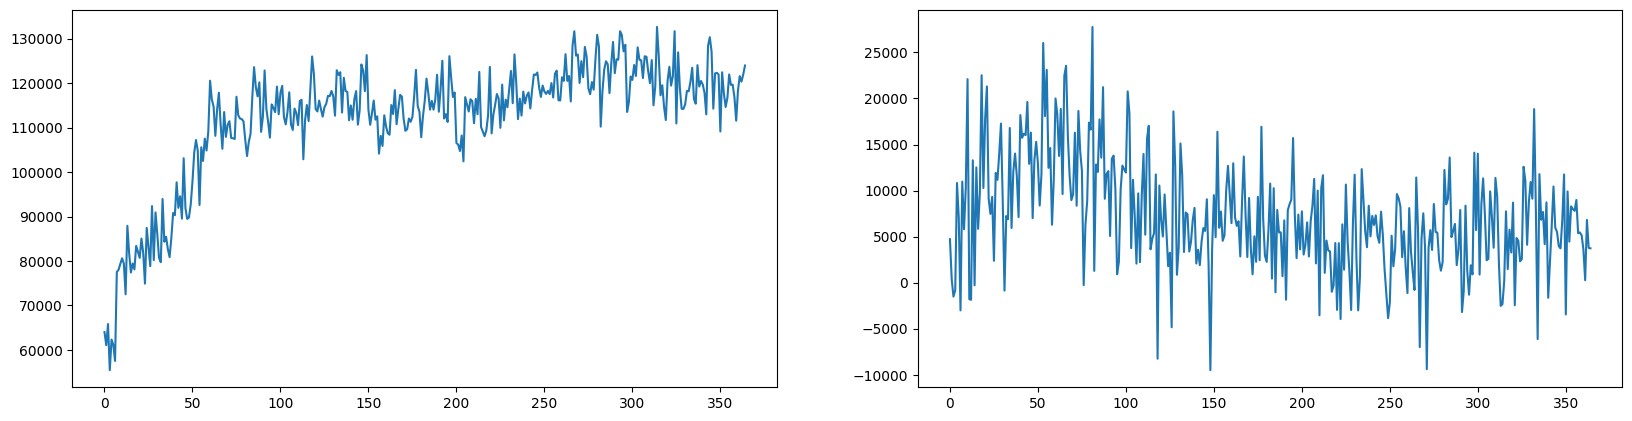

profits = 1.10455, max profits = 18.72754
pips = 102.78571945057038, max pip = 260.5742292917815
5/5 [==============================] - 0s 29ms/step - loss: 24.1964


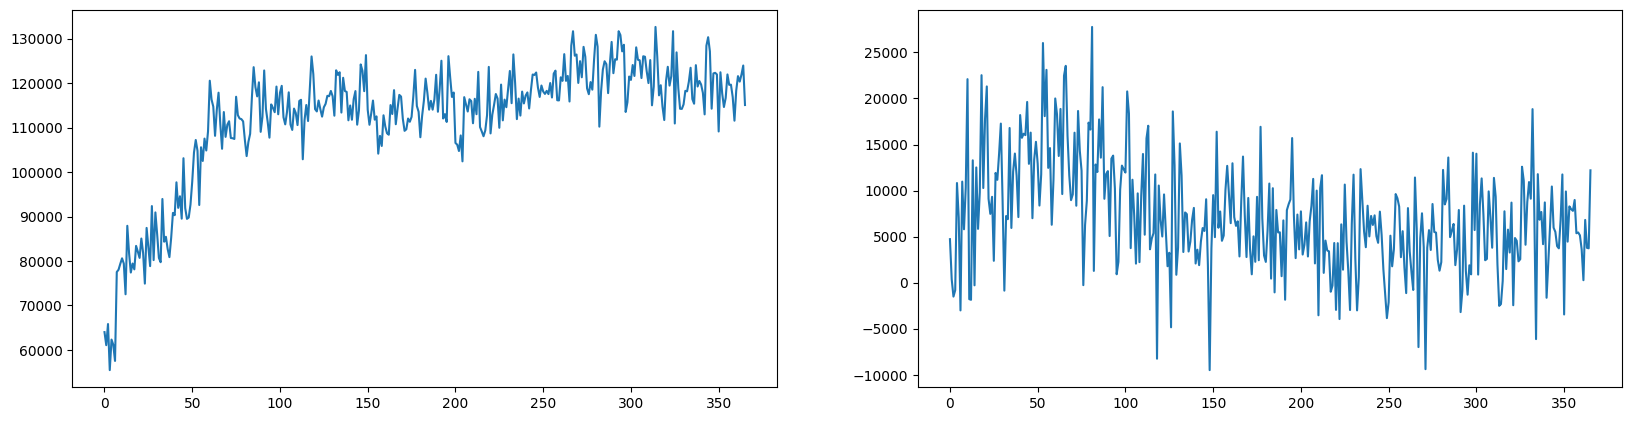

profits = 2.28288, max profits = 18.72754
pips = 137.0346713612643, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 24.1619


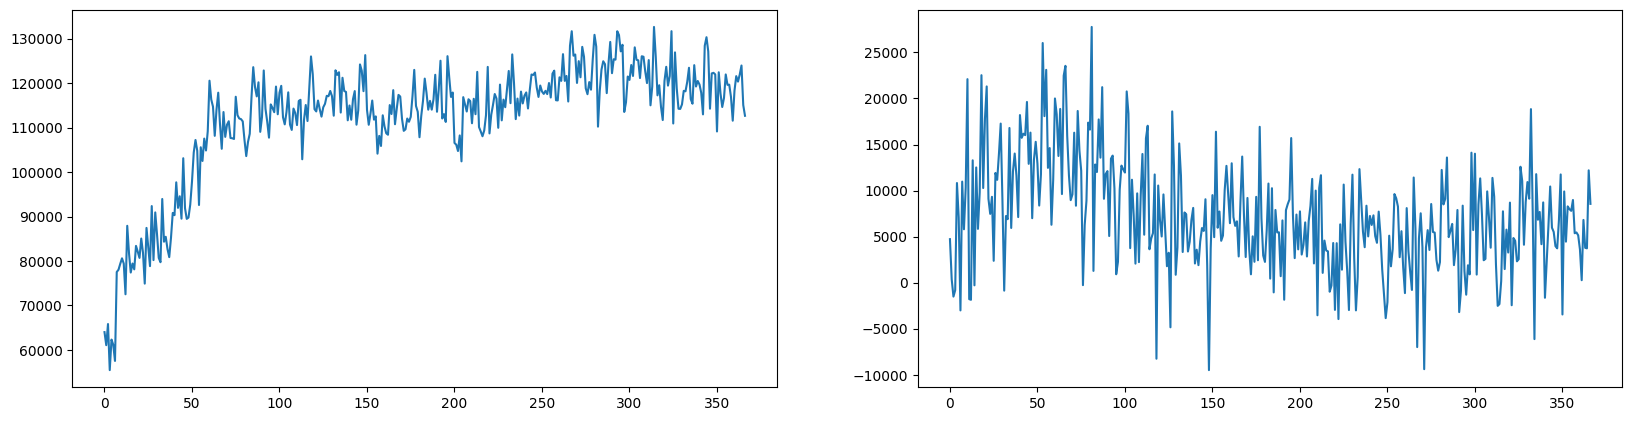

profits = 1.3358, max profits = 18.72754
pips = 99.84303004552352, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 24.0954


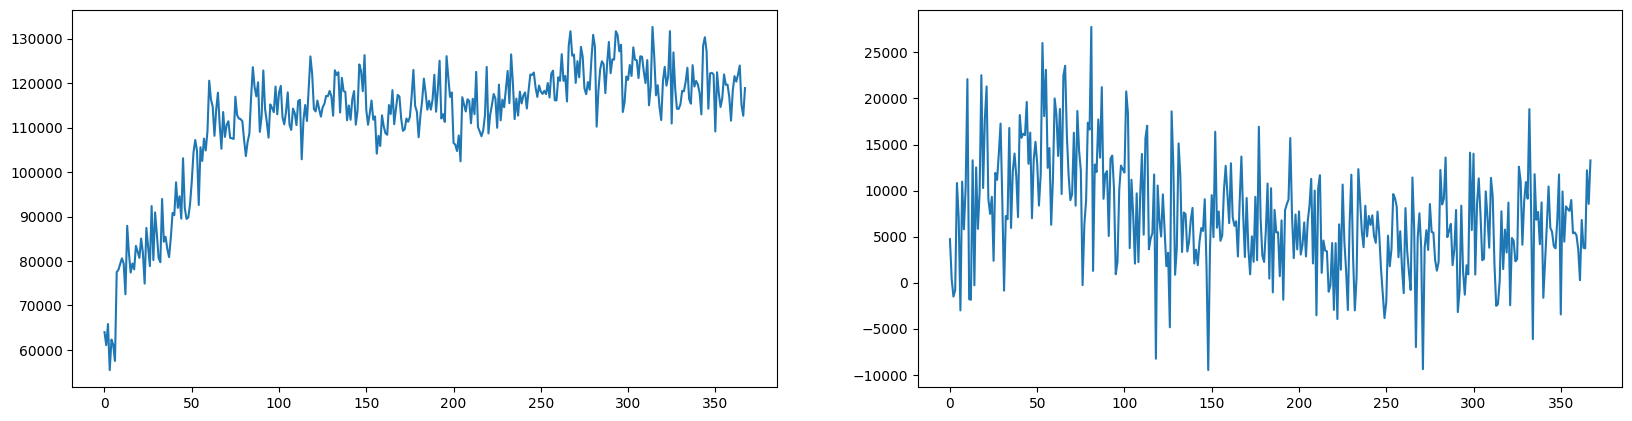

profits = 2.70519, max profits = 18.72754
pips = 143.2659919369965, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 24.4651


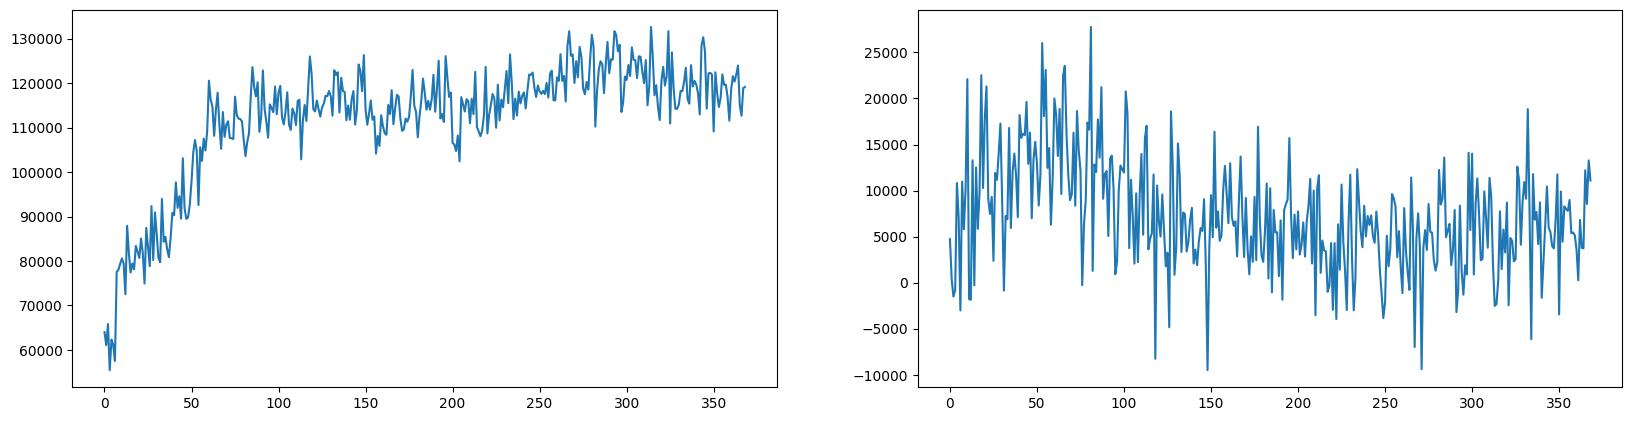

profits = 2.00071, max profits = 18.72754
pips = 143.27216560495094, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.8498


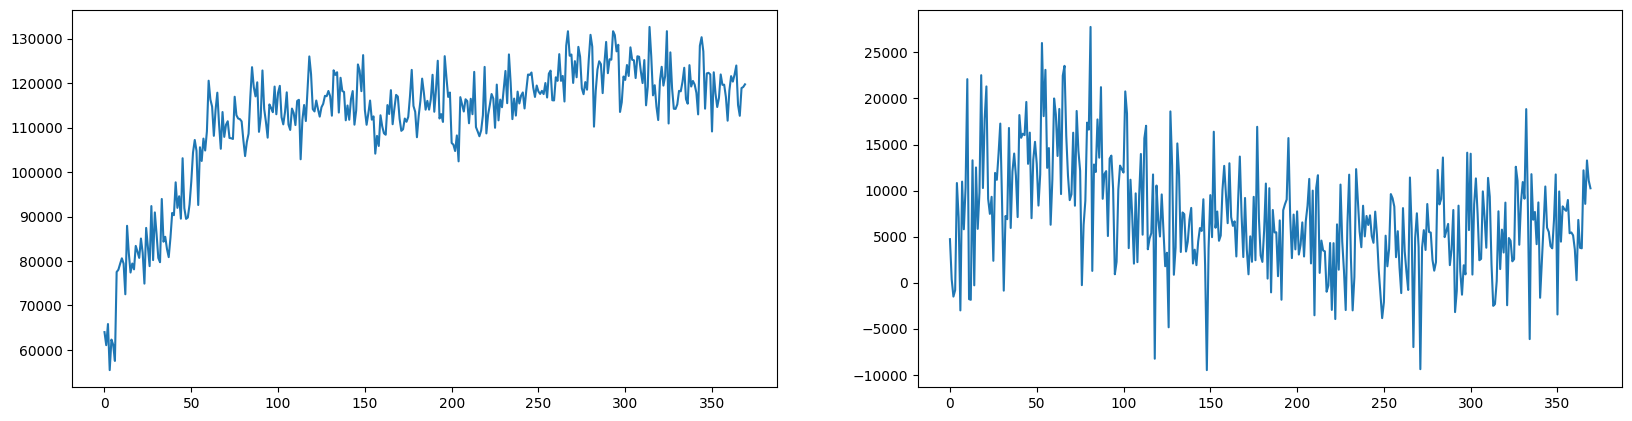

profits = 2.19195, max profits = 18.72754
pips = 115.57175482312942, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.9834


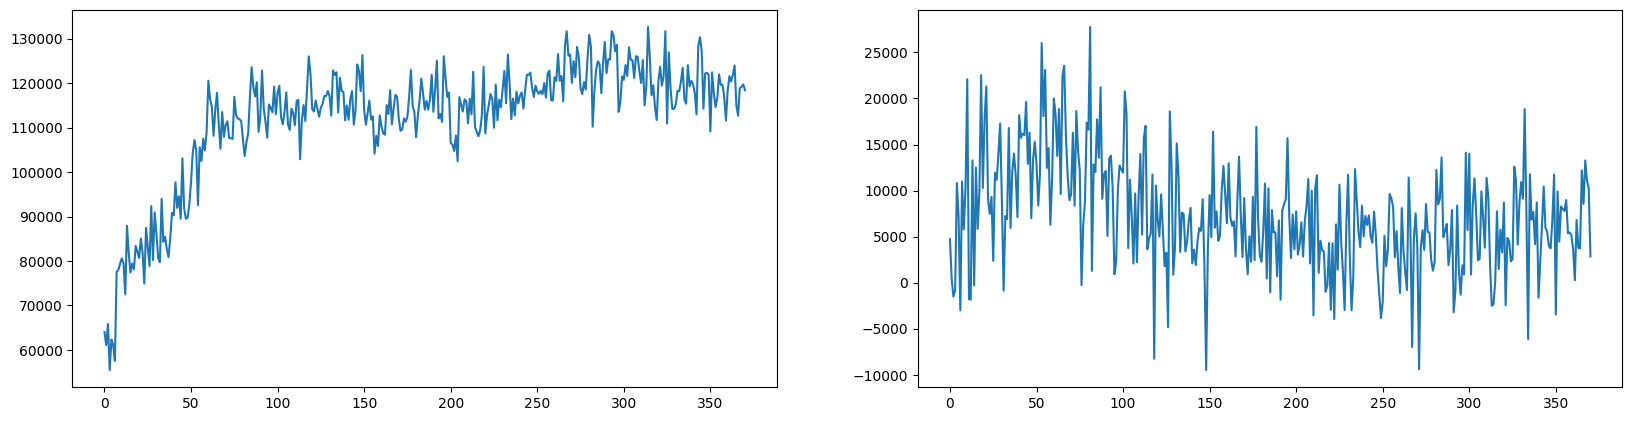

profits = 1.10455, max profits = 18.72754
pips = 69.60021792043855, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.8398


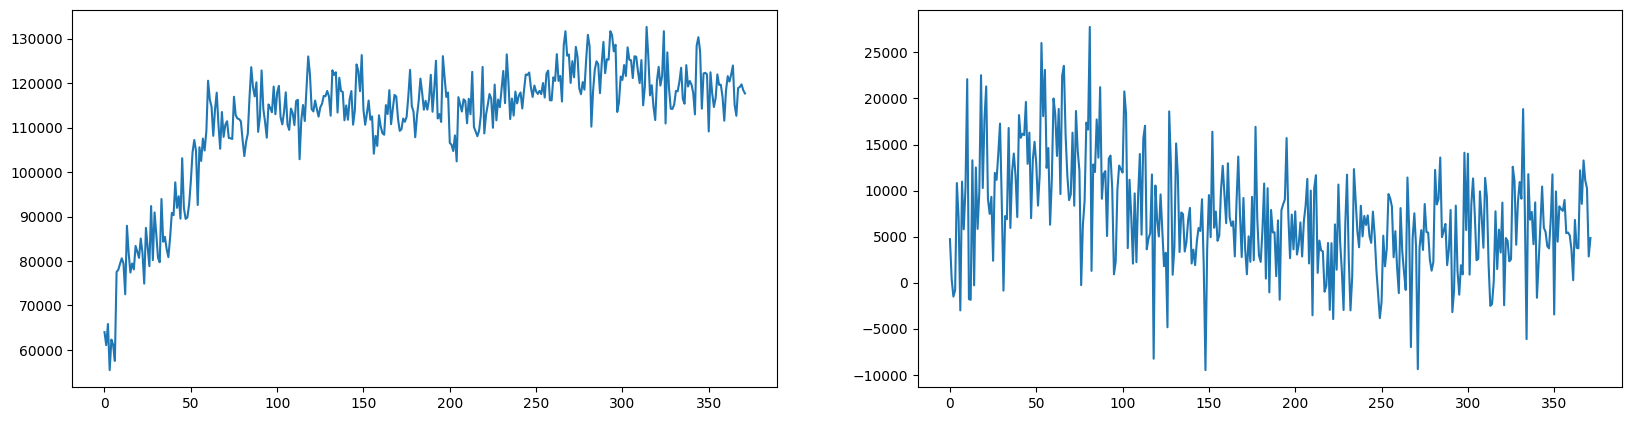

profits = 1.0, max profits = 18.72754
pips = 115.76513711038922, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.8973


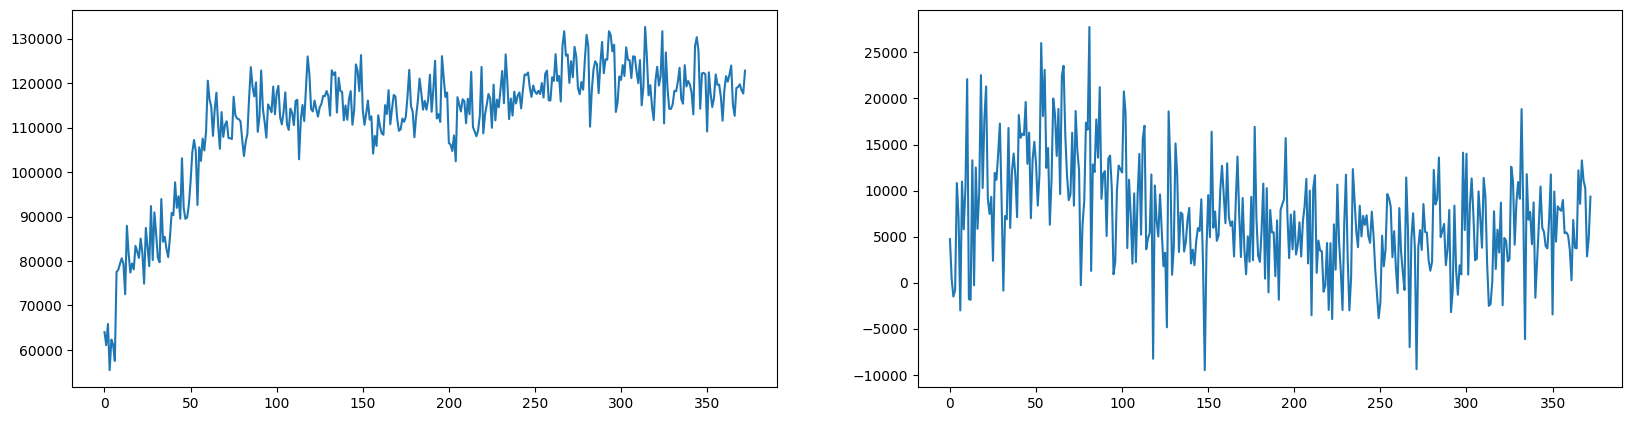

profits = 1.69702, max profits = 18.72754
pips = 117.00162989219511, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.8164


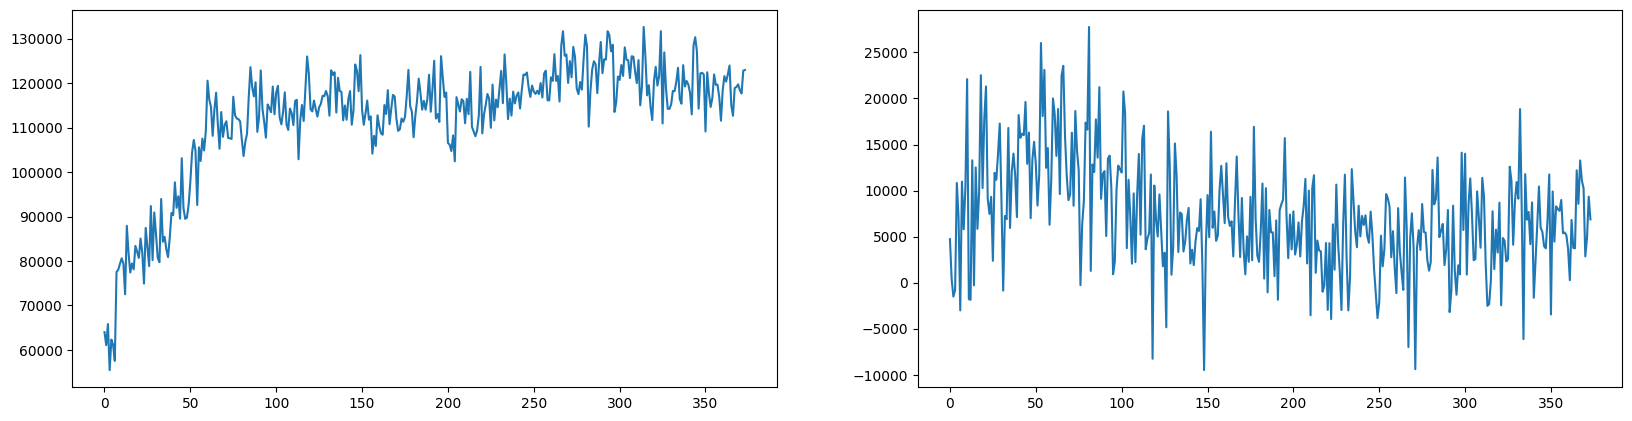

profits = 1.10455, max profits = 18.72754
pips = 104.15921053138442, max pip = 260.5742292917815
5/5 [==============================] - 0s 26ms/step - loss: 24.0431


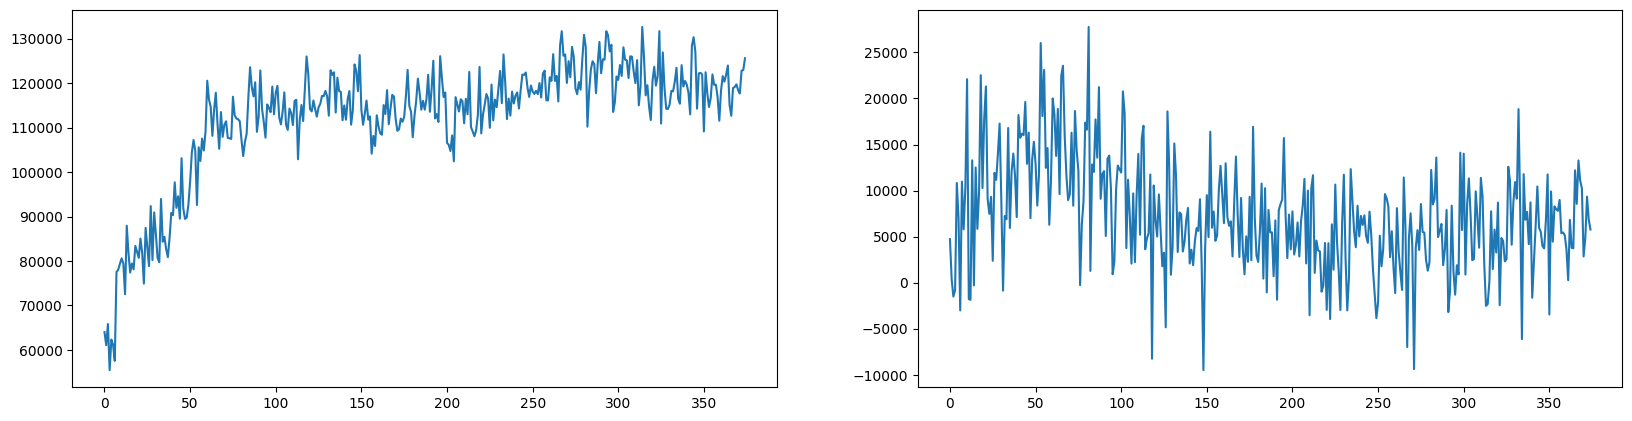

profits = 1.10455, max profits = 18.72754
pips = 114.74548170326523, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.8021


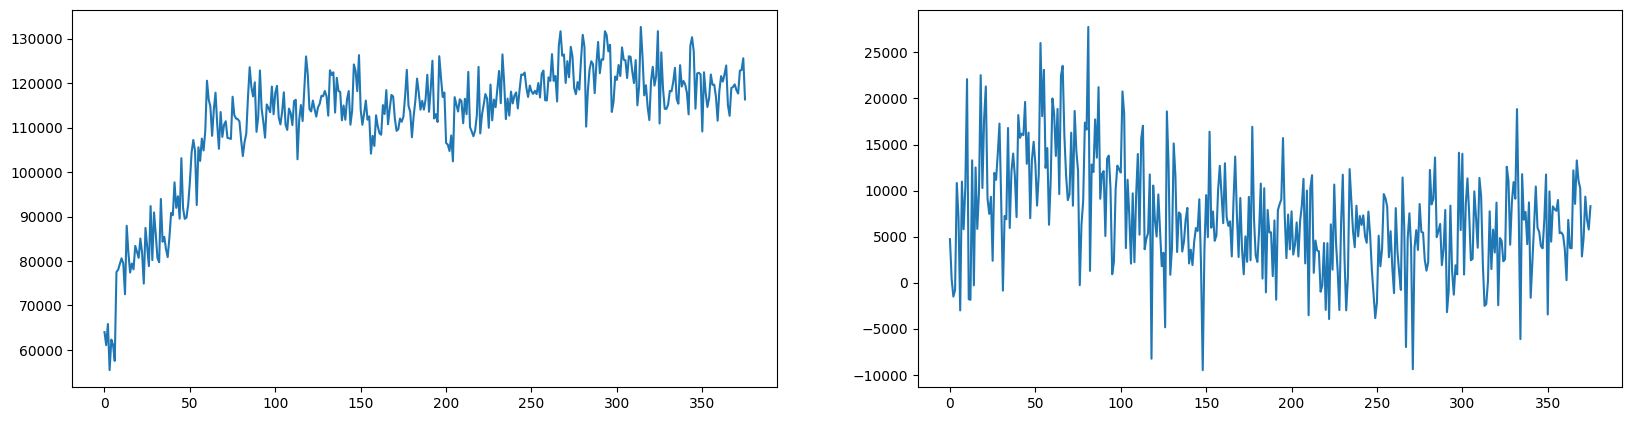

profits = 1.10455, max profits = 18.72754
pips = 107.50976664301201, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.8403


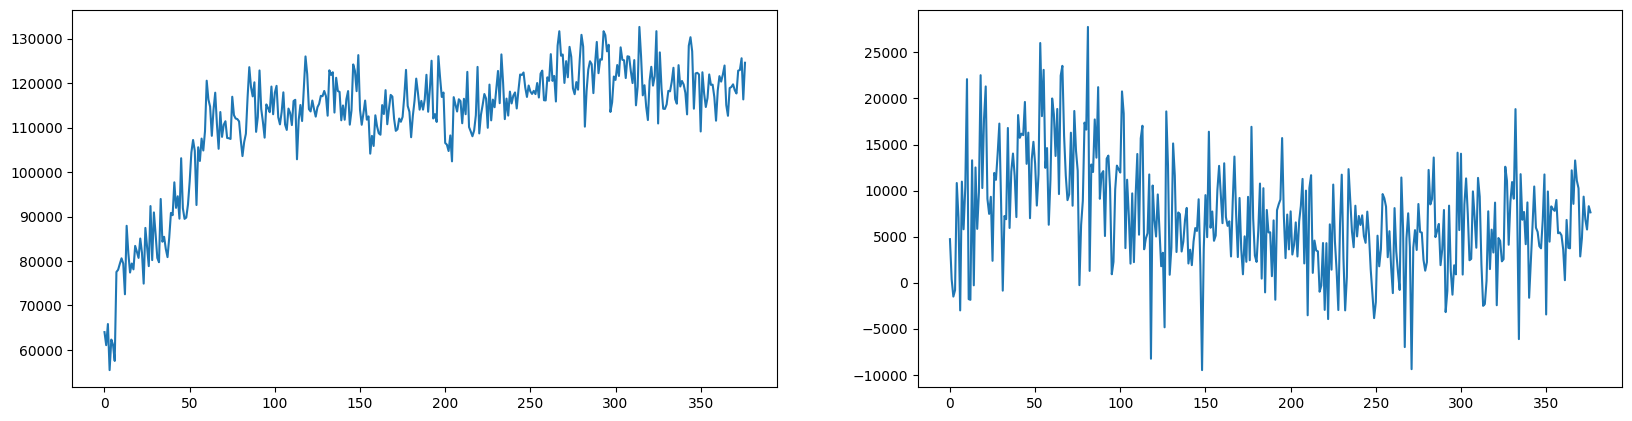

profits = 1.51423, max profits = 18.72754
pips = 106.75772778481125, max pip = 260.5742292917815
5/5 [==============================] - 0s 29ms/step - loss: 23.8030


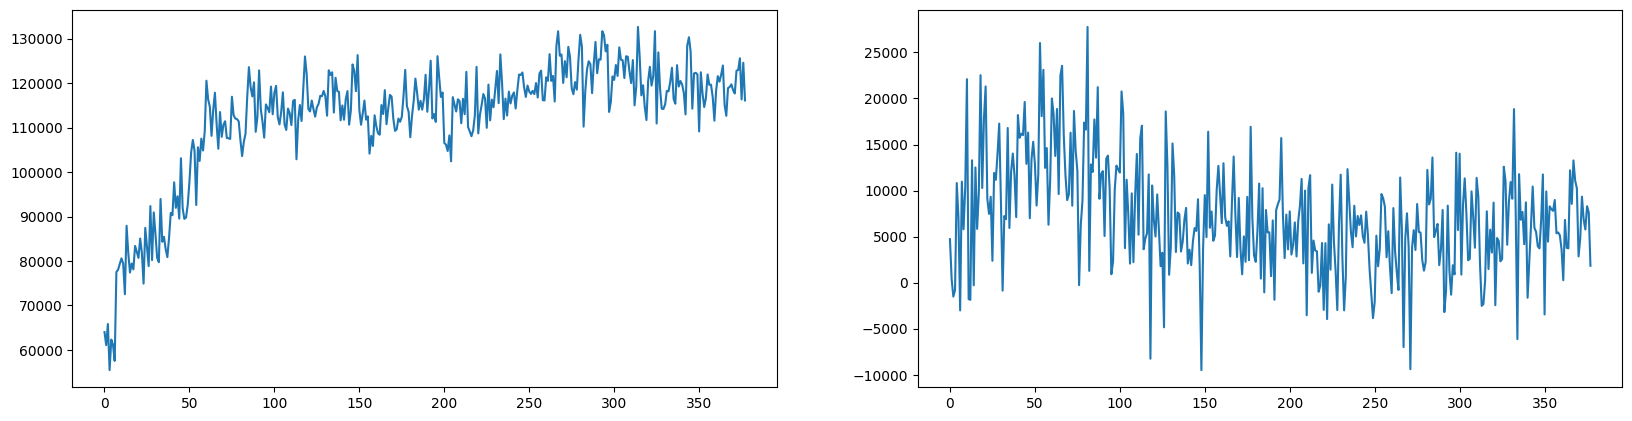

profits = 1.10455, max profits = 18.72754
pips = 81.7286523411626, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 24.0355


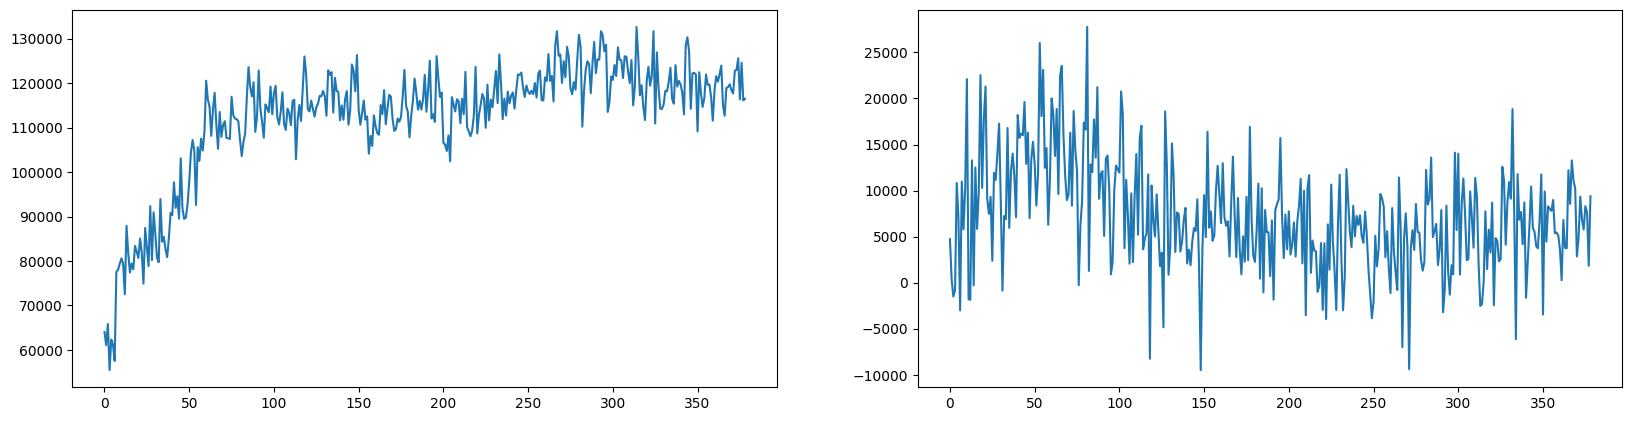

profits = 1.34252, max profits = 18.72754
pips = 111.65208738088329, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 24.0133


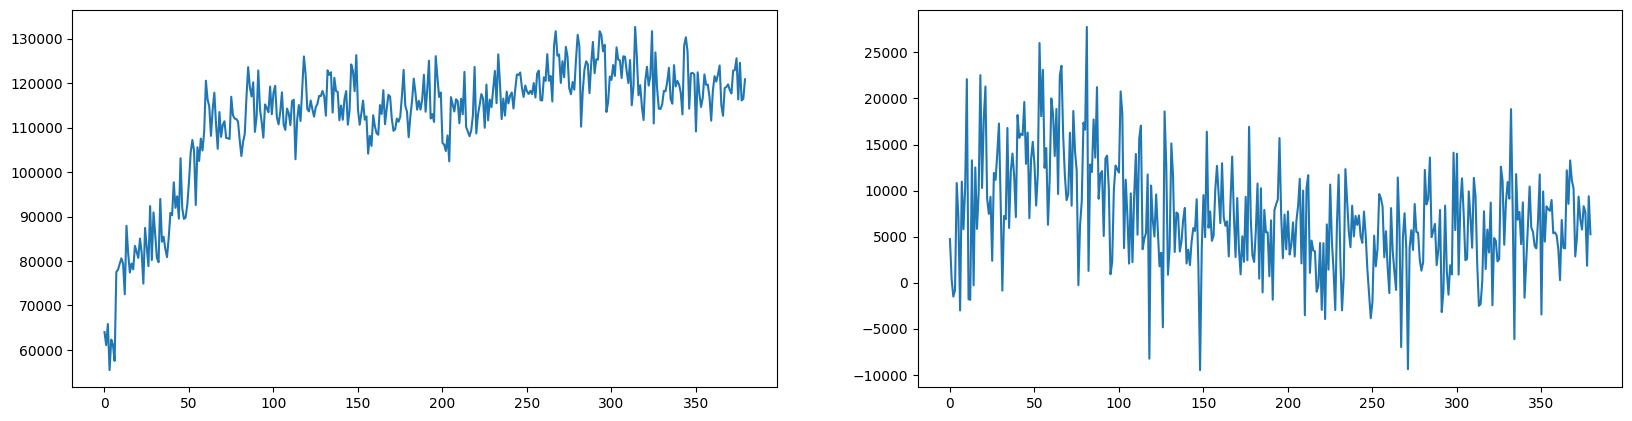

profits = 1.12724, max profits = 18.72754
pips = 100.77340453557798, max pip = 260.5742292917815
5/5 [==============================] - 0s 29ms/step - loss: 23.8753


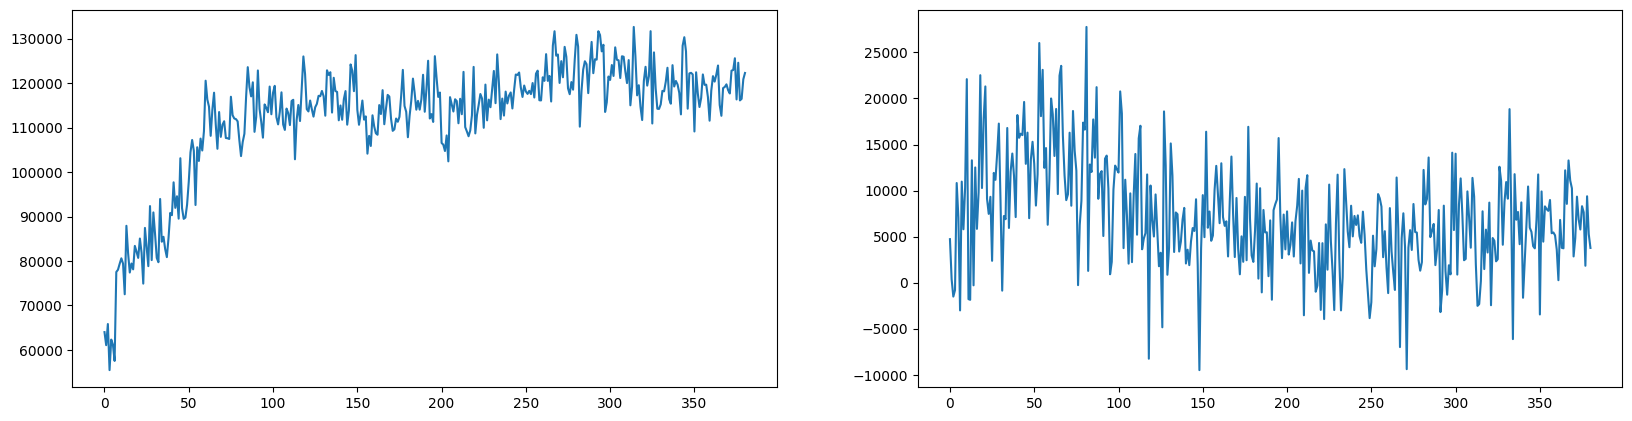

profits = 1.17893, max profits = 18.72754
pips = 110.52306093531693, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.9935


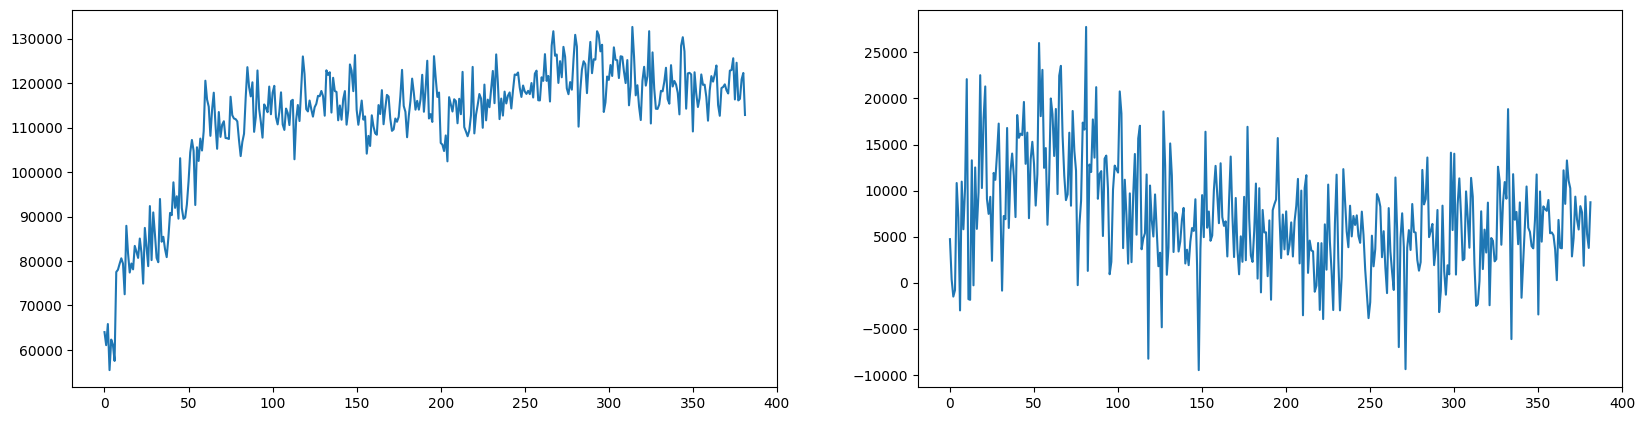

profits = 1.31525, max profits = 18.72754
pips = 128.59451336657798, max pip = 260.5742292917815
5/5 [==============================] - 0s 29ms/step - loss: 23.8327


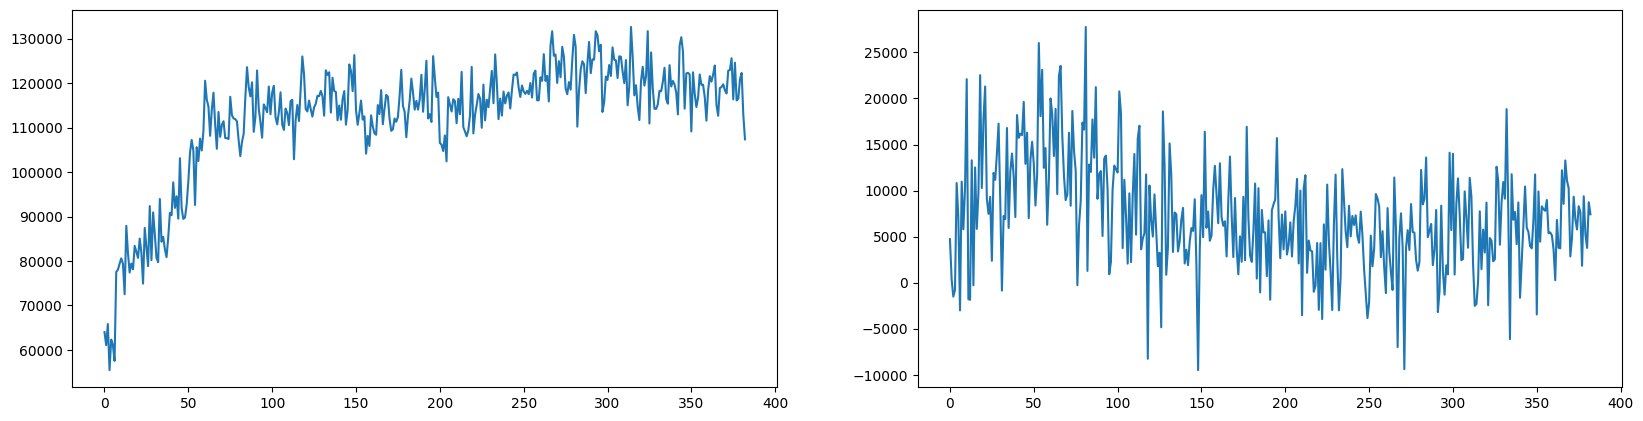

profits = 1.09233, max profits = 18.72754
pips = 109.64934205335857, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.5325


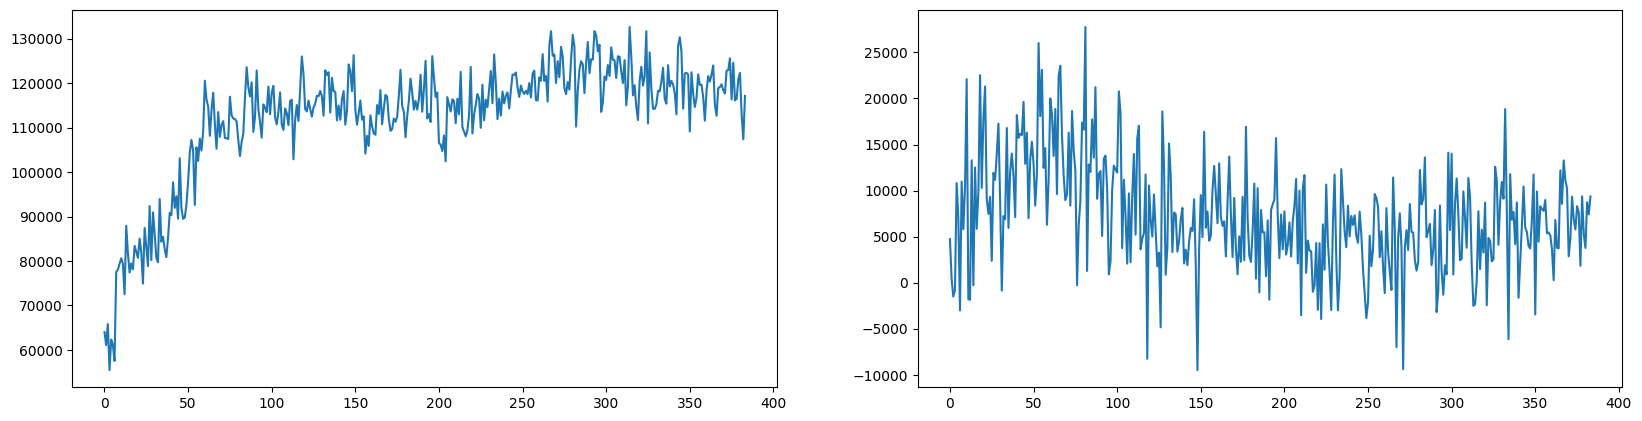

profits = 1.58958, max profits = 18.72754
pips = 122.19245871901005, max pip = 260.5742292917815
5/5 [==============================] - 0s 29ms/step - loss: 23.5220


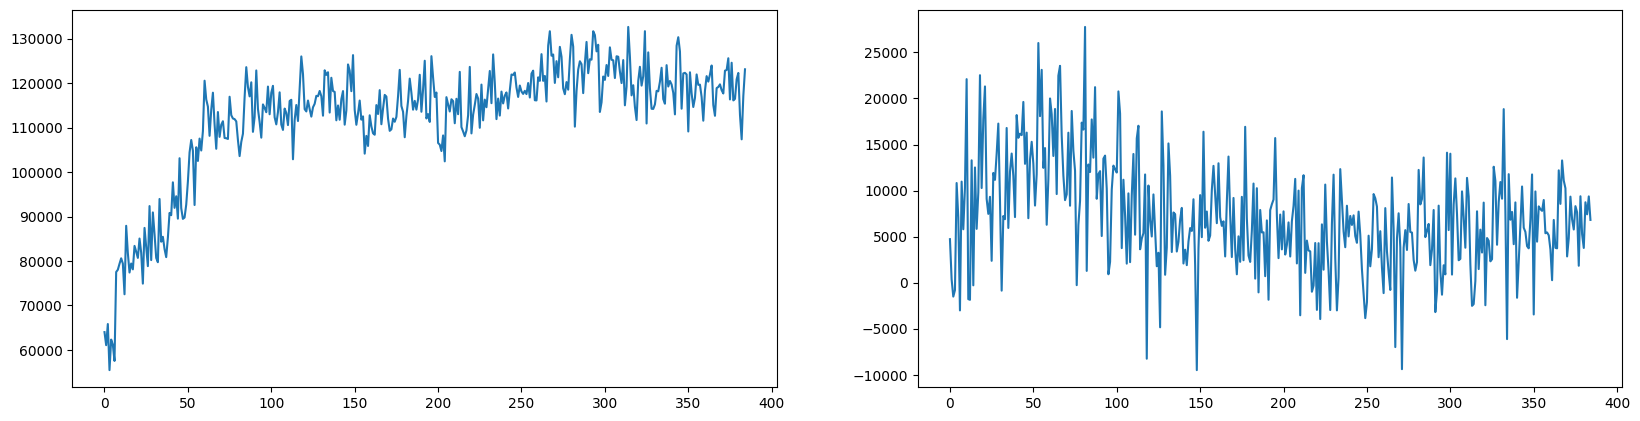

profits = 1.22725, max profits = 18.72754
pips = 114.62899403397562, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.7416


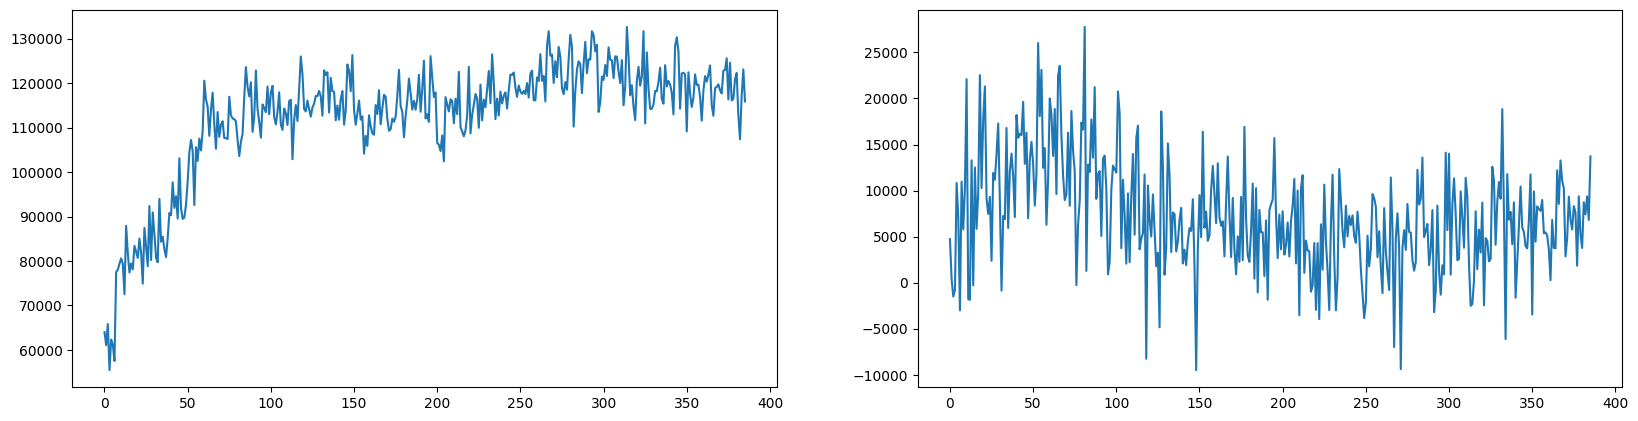

profits = 1.90645, max profits = 18.72754
pips = 145.07325921198483, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.6837


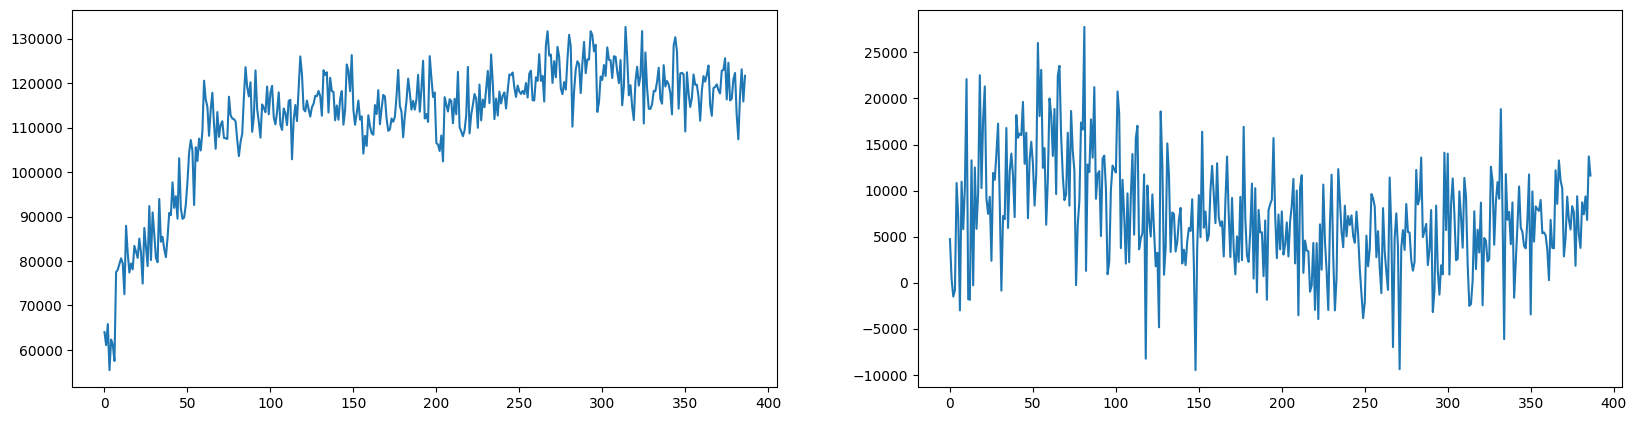

profits = 1.3459, max profits = 18.72754
pips = 154.2550918528813, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.5359


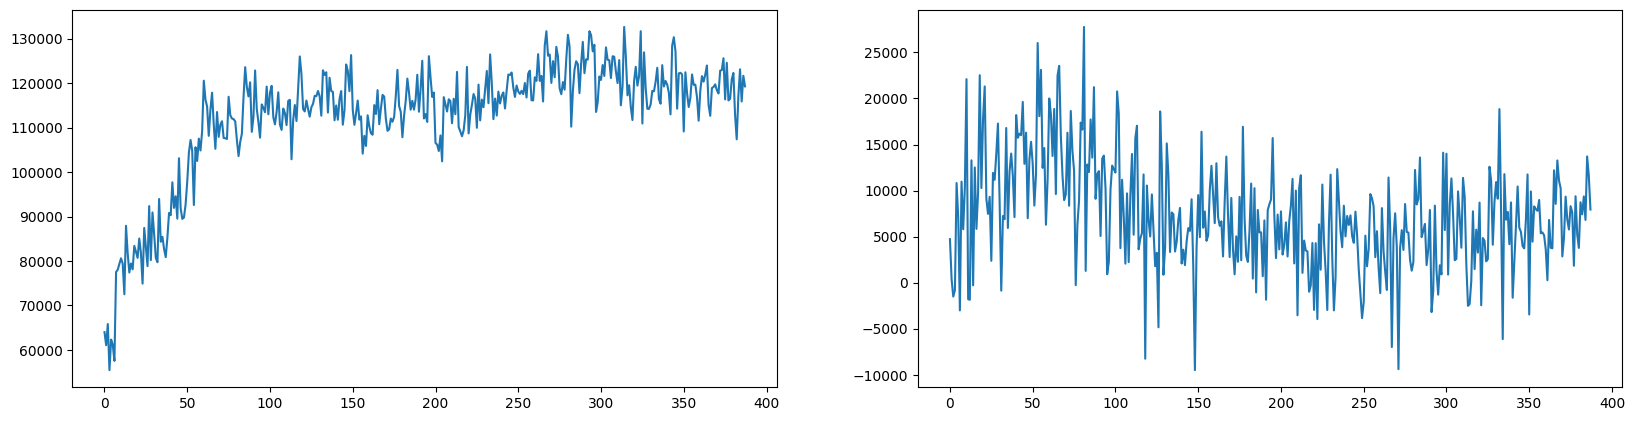

profits = 1.06298, max profits = 18.72754
pips = 126.78678988641673, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.4695


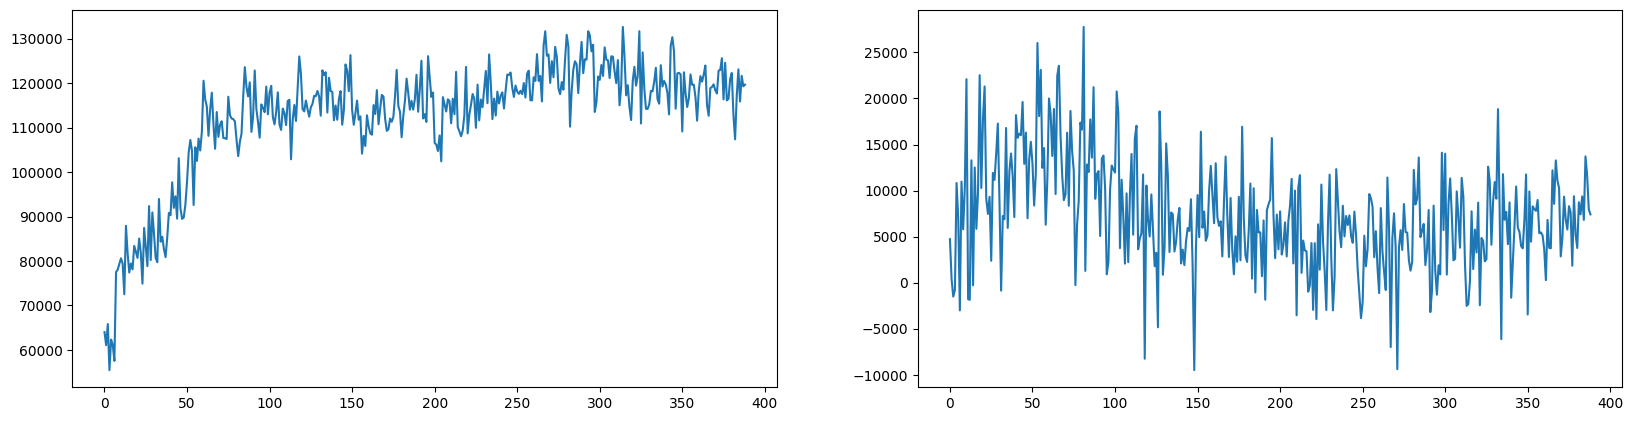

profits = 1.18837, max profits = 18.72754
pips = 98.03901074976457, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.6911


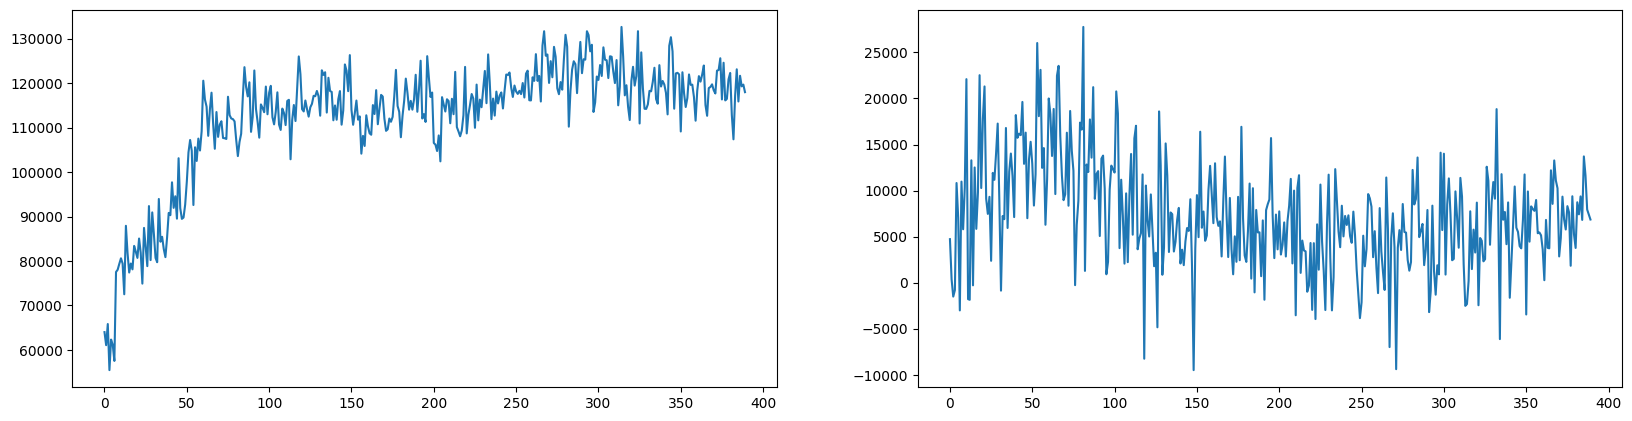

profits = 1.0394, max profits = 18.72754
pips = 82.60570104043894, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.6680


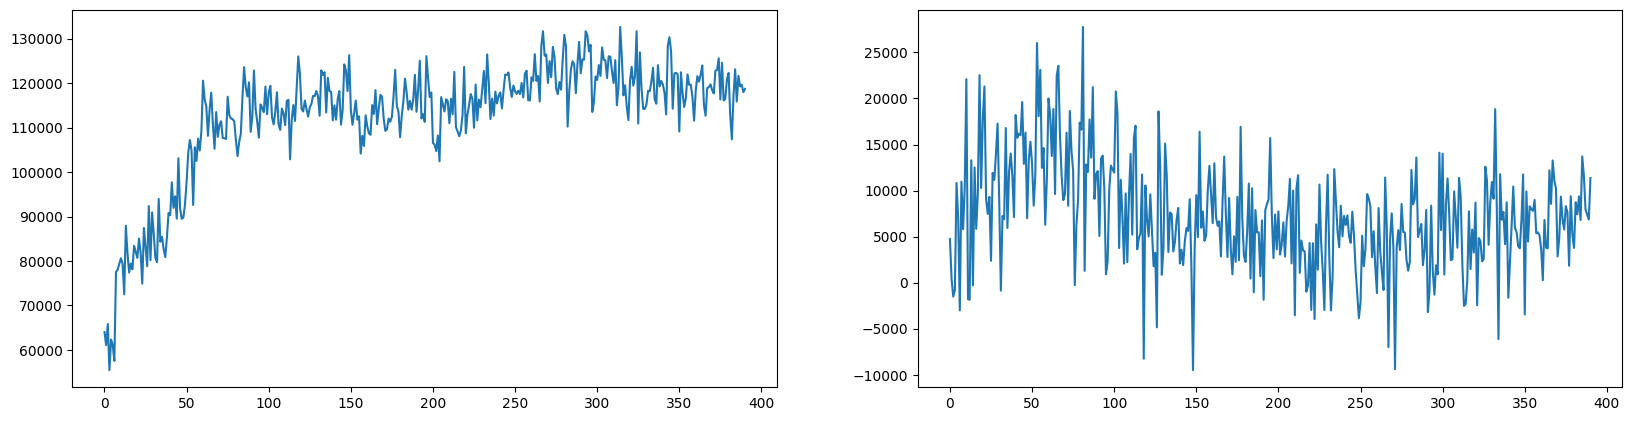

profits = 1.88356, max profits = 18.72754
pips = 171.15515606421263, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.3858


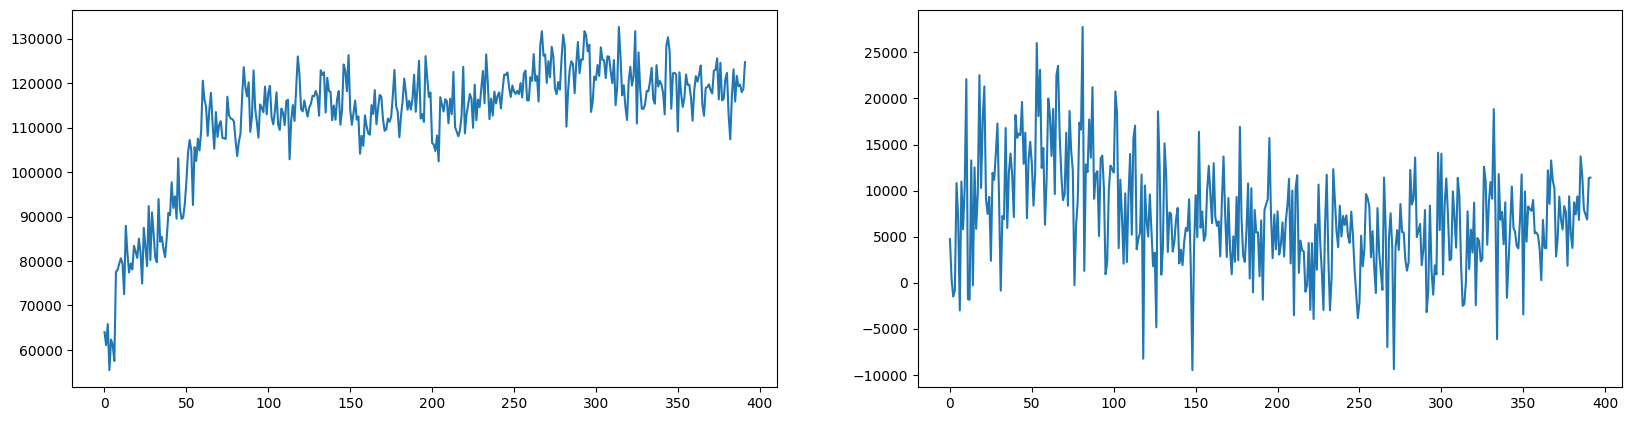

profits = 1.68548, max profits = 18.72754
pips = 116.92698575082949, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.5452


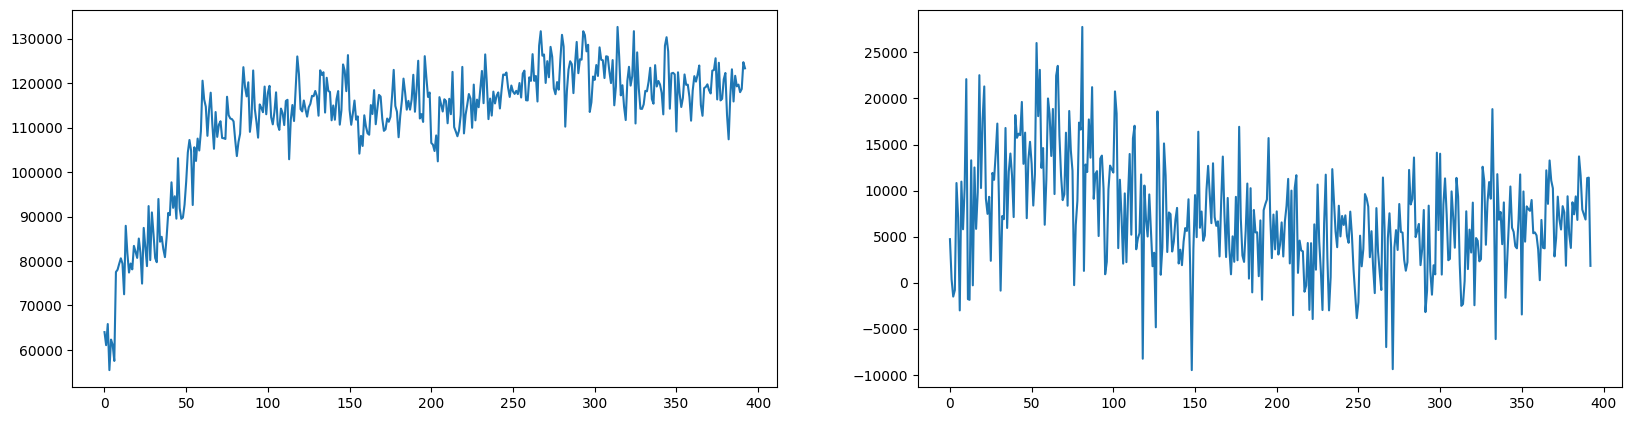

profits = 1.17893, max profits = 18.72754
pips = 64.80726507507691, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.6533


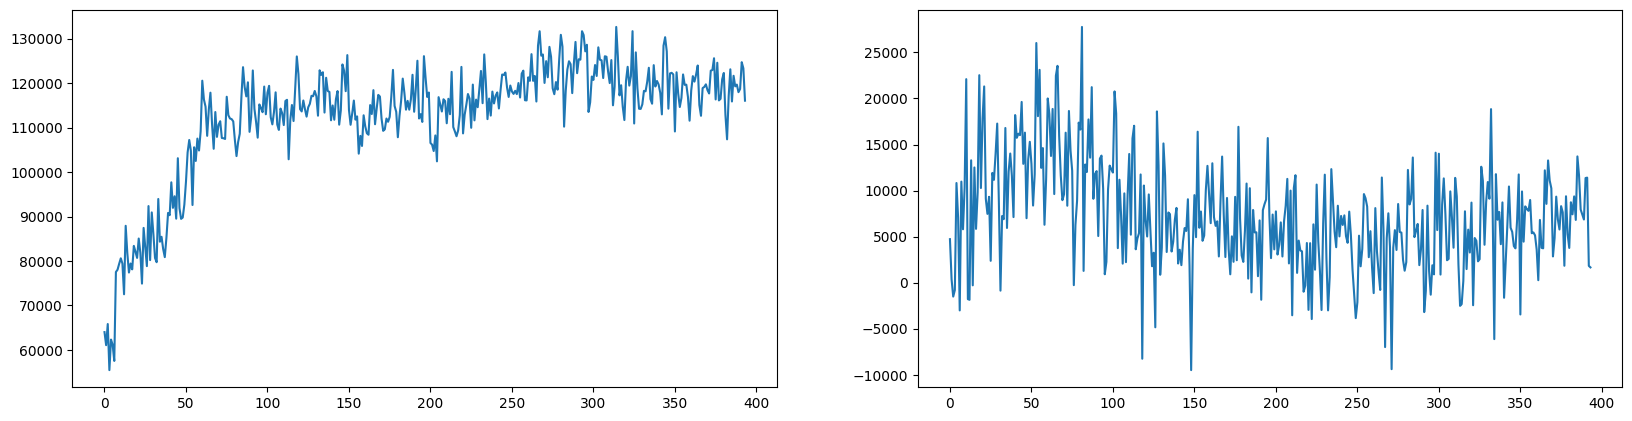

profits = 1.10455, max profits = 18.72754
pips = 66.28436814691823, max pip = 260.5742292917815
5/5 [==============================] - 0s 27ms/step - loss: 23.4864


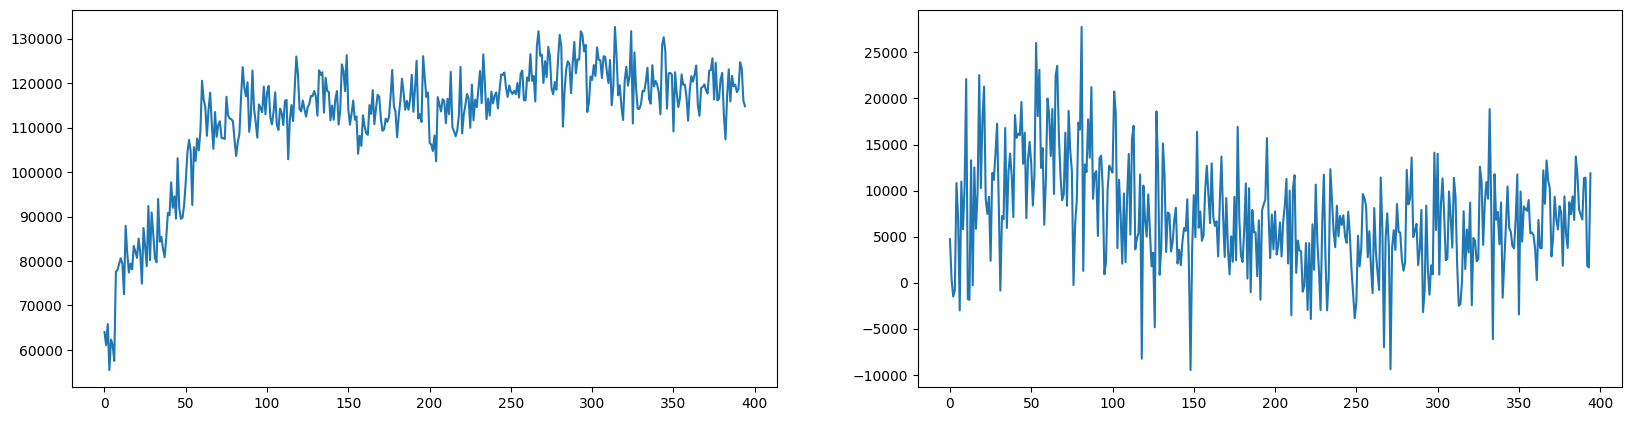

profits = 1.27204, max profits = 18.72754
pips = 118.21296662292653, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.5317


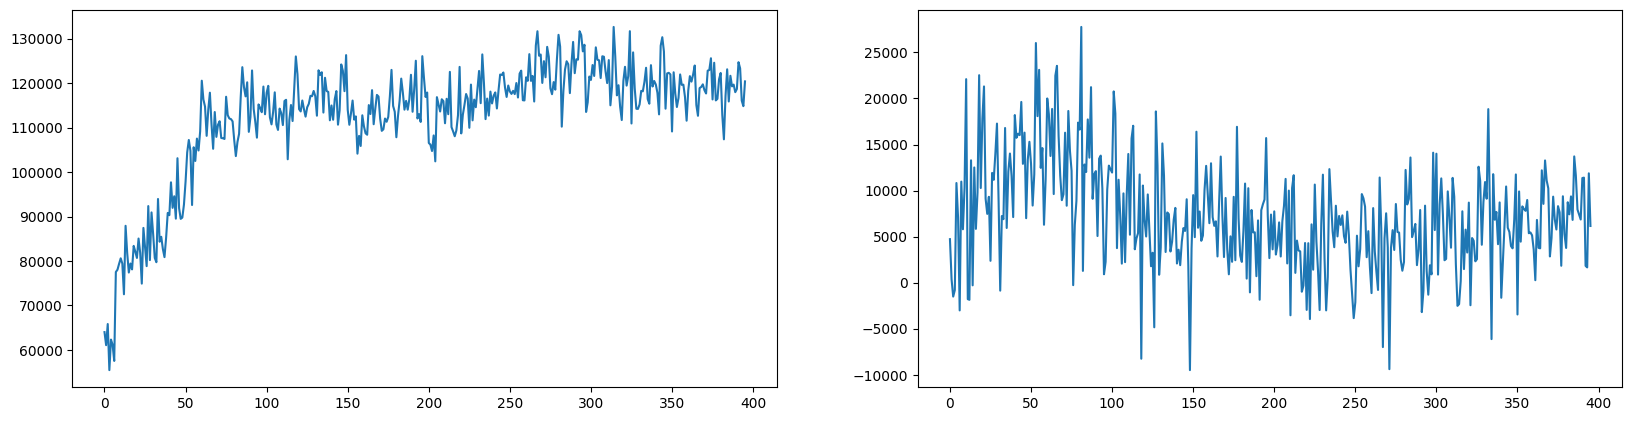

profits = 1.16004, max profits = 18.72754
pips = 105.87043683267645, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.2942


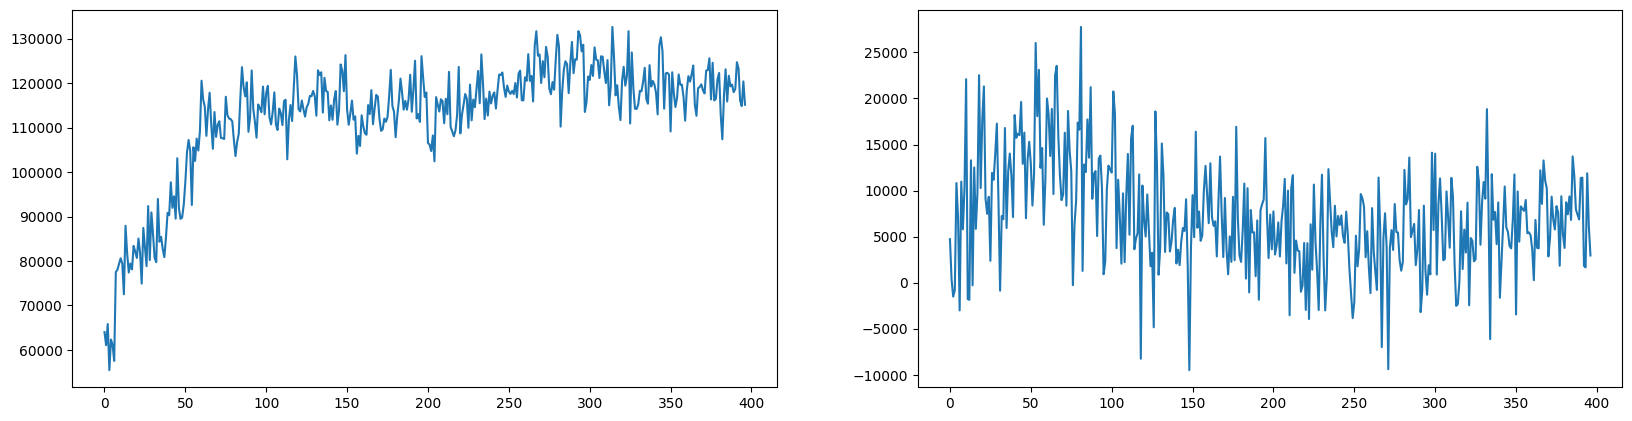

profits = 1.0909, max profits = 18.72754
pips = 95.266646692143, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.5180


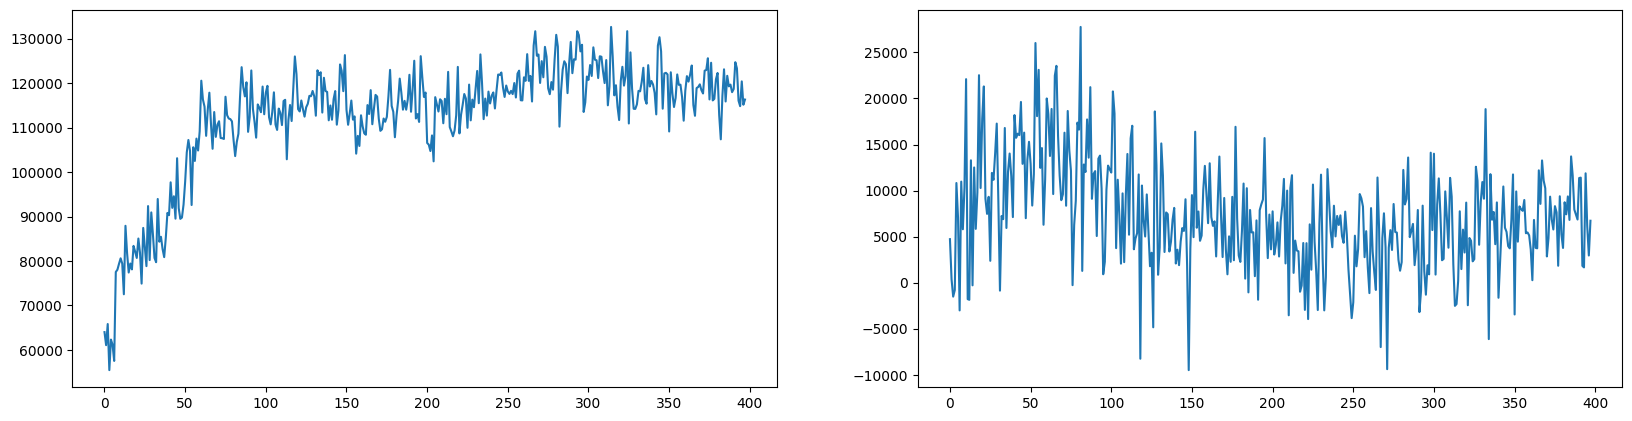

profits = 1.12976, max profits = 18.72754
pips = 89.94516426877159, max pip = 260.5742292917815
5/5 [==============================] - 0s 29ms/step - loss: 23.4224


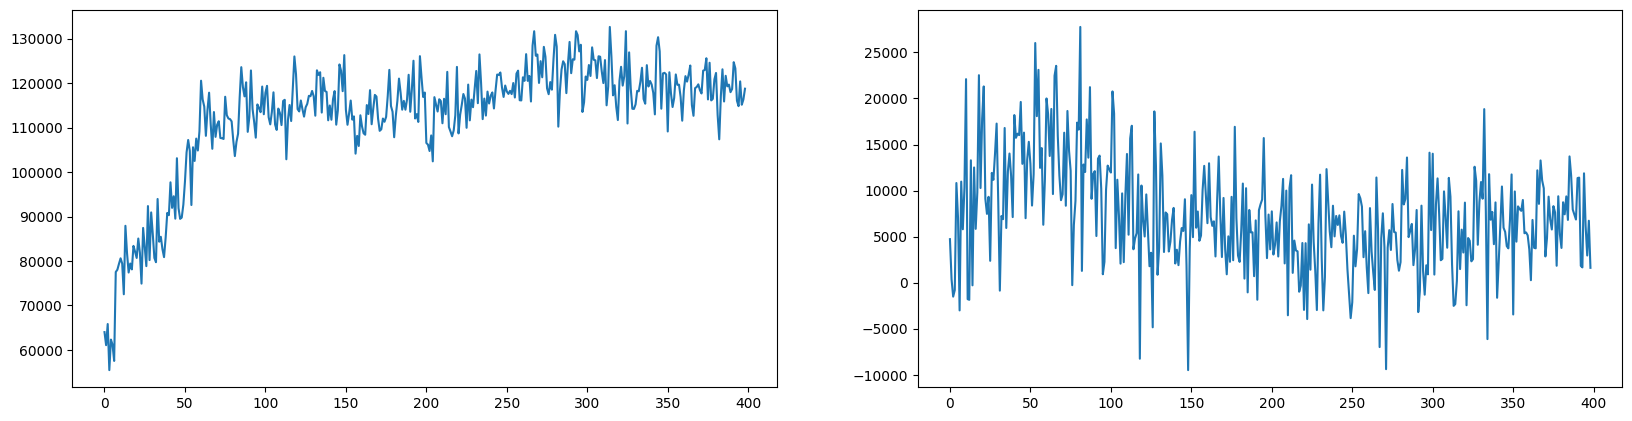

profits = 1.17796, max profits = 18.72754
pips = 74.00068996715082, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.4561


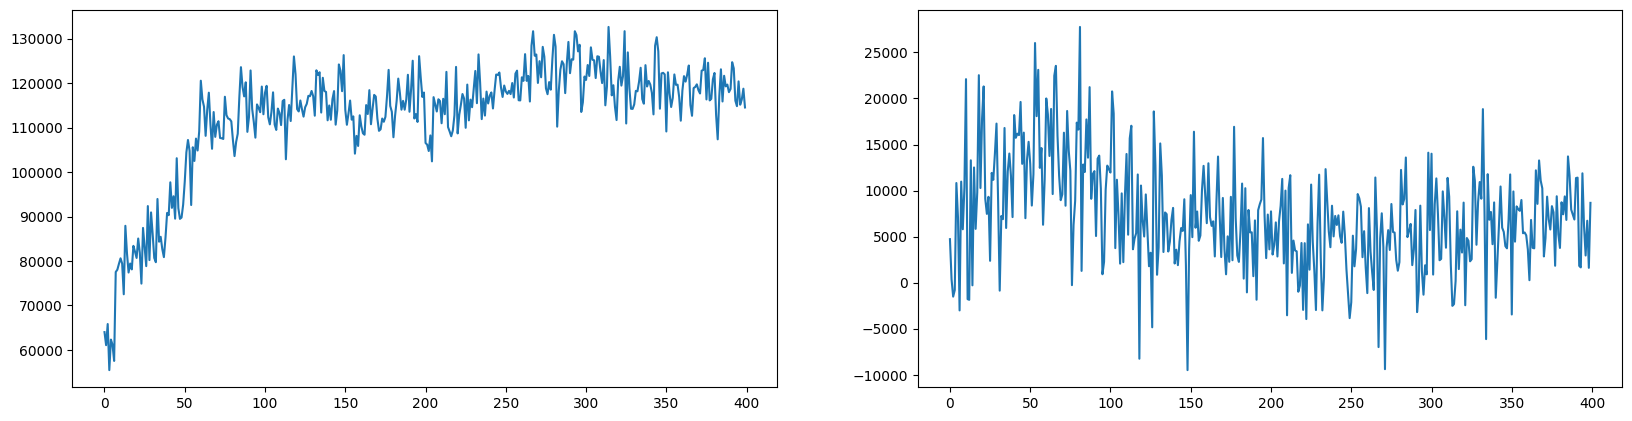

profits = 1.4986, max profits = 18.72754
pips = 166.47755122359015, max pip = 260.5742292917815
5/5 [==============================] - 0s 28ms/step - loss: 23.4925


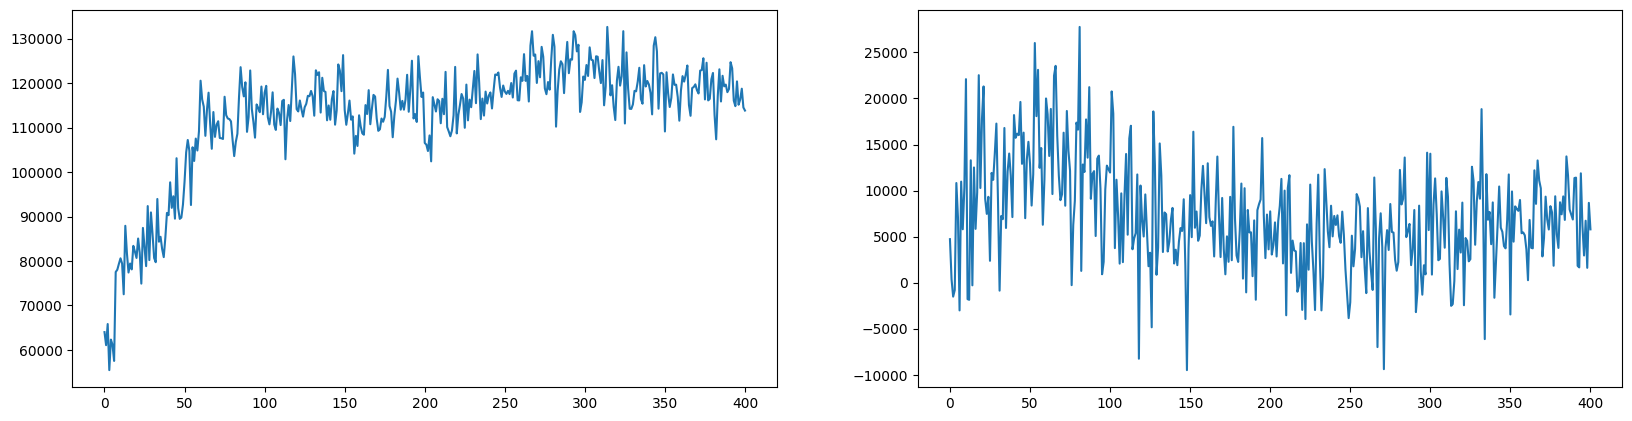

profits = 1.10455, max profits = 18.72754
pips = 93.34175239415036, max pip = 260.5742292917815


In [4]:
self.train()
w = self.model.get_weights()

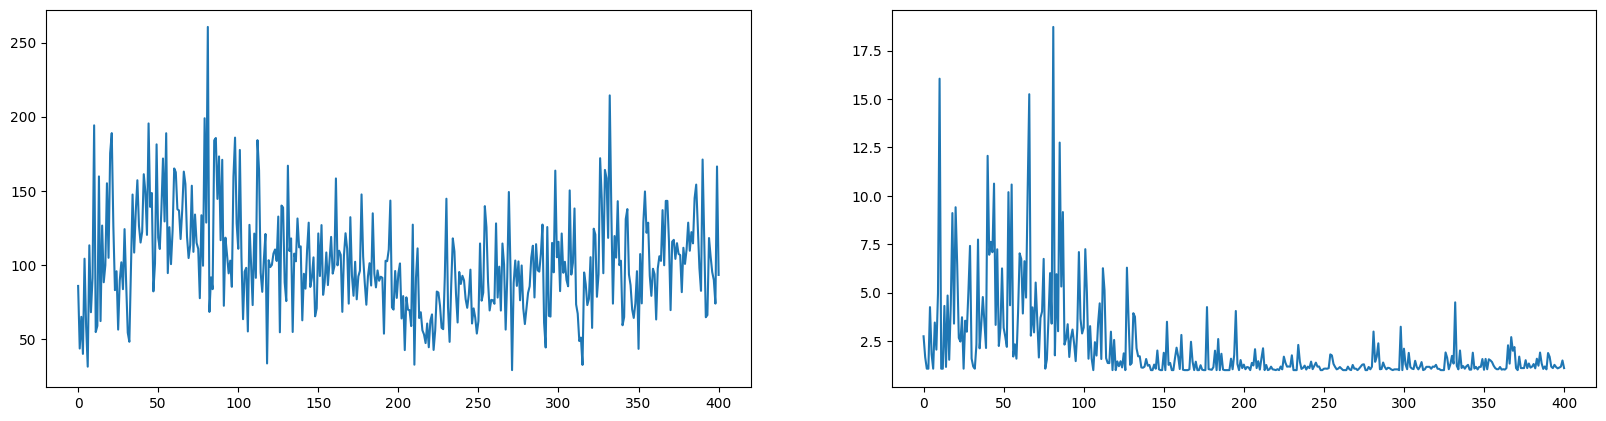

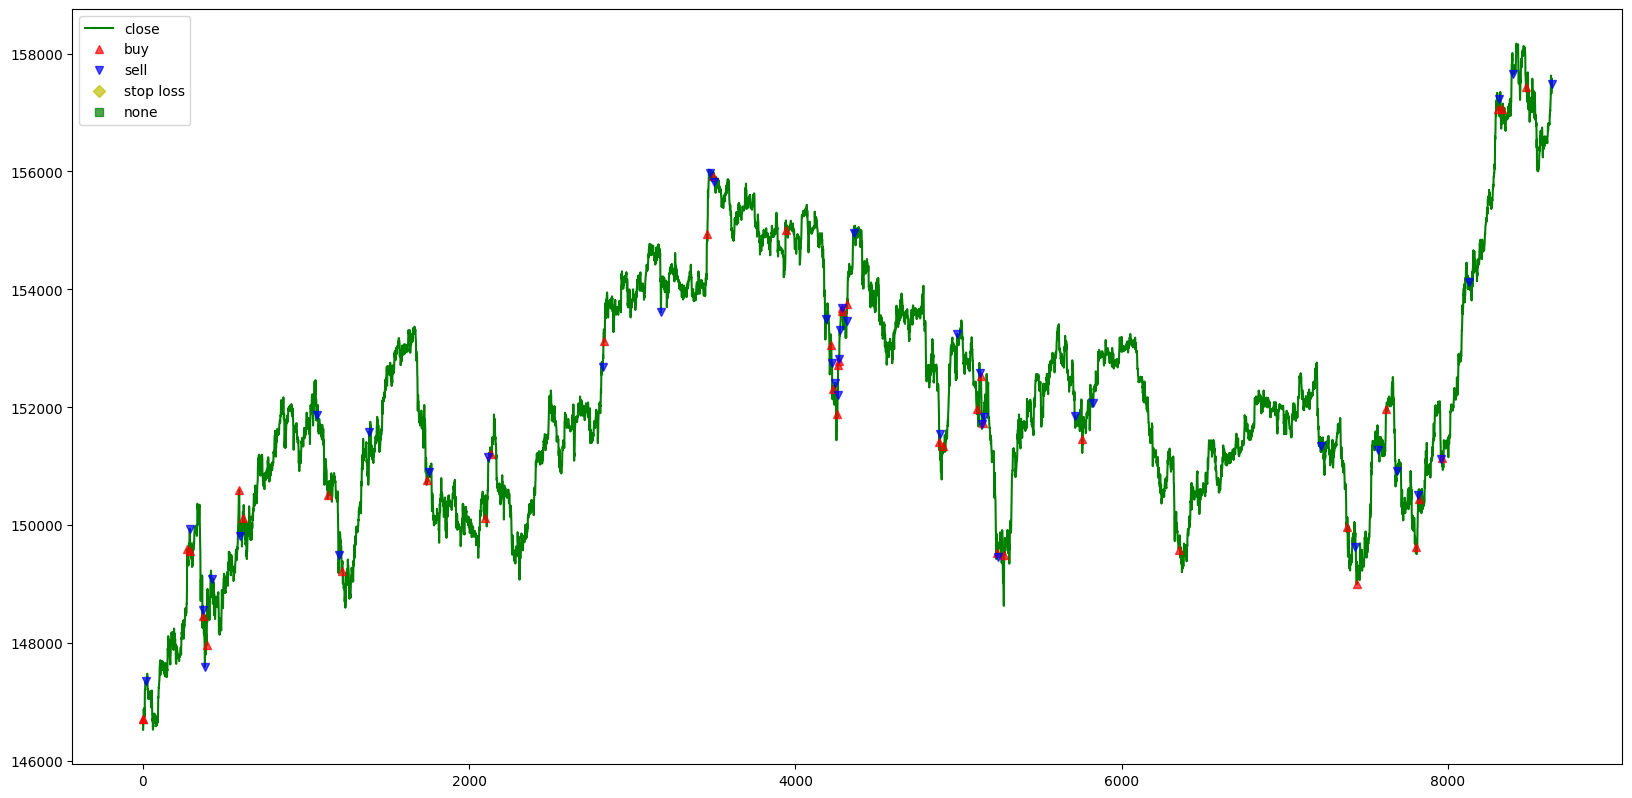

pip = 27769.0
account size = 1334929.0
growth rate = 13.34929
accuracy = 0.6626506024096386


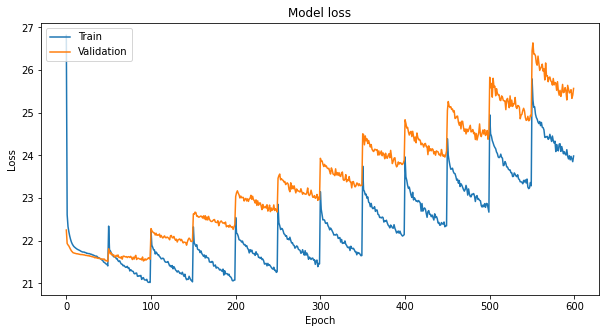

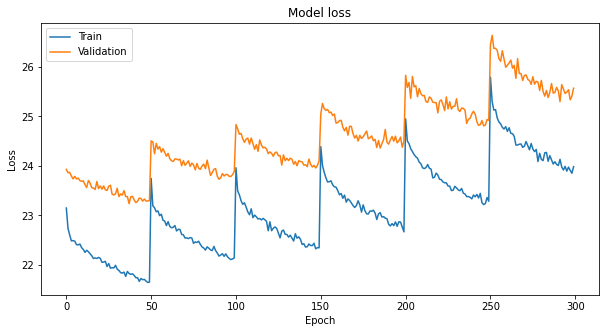

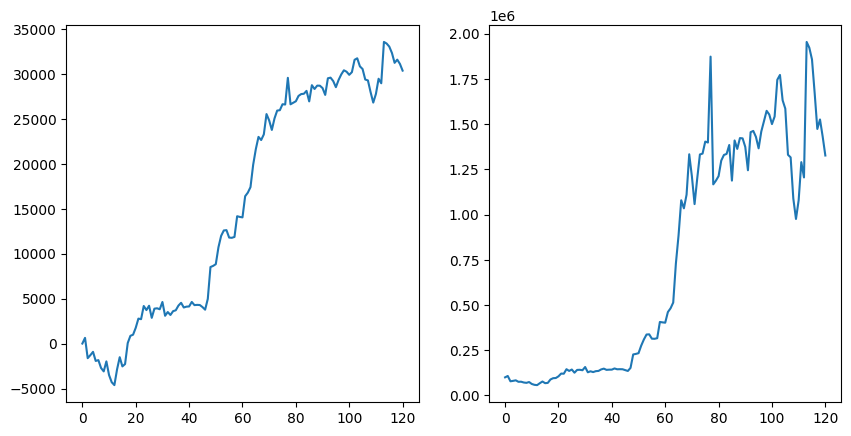

acc = 0.5833333333333334, pips = 30341.0
total_win = 62985.0, total_lose = -32644.0
rr = 1.9294510476657272, ev = 0.3872712698607199
mean draw down = -1577.875, min draw down = -5253.0
total plus pip = 20035.0, total minus_pip = 10306.0


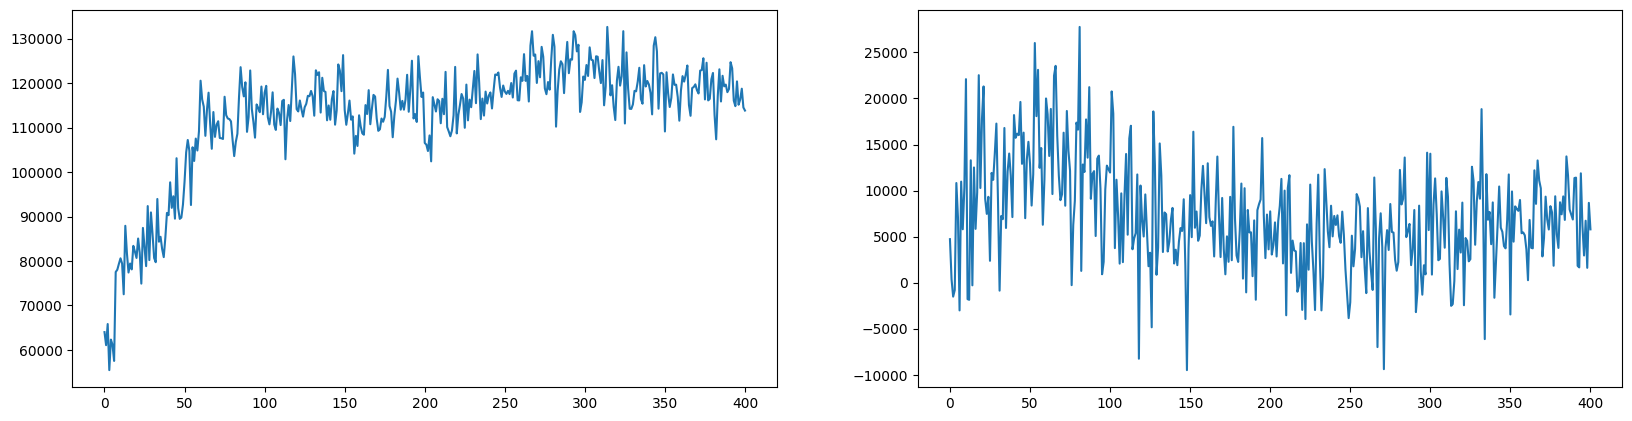

profits = 1953963.0, max profits = 18.72754
pips = 33530.0, max pip = 260.5742292917815


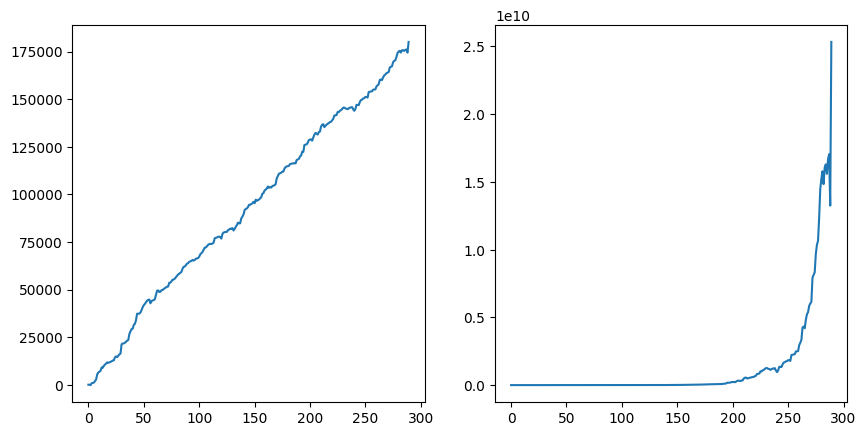

acc = 0.8615916955017301, pips = 180079.0
total_win = 199165.0, total_lose = -19086.0
rr = 10.435135701561354, ev = 1.3059011351642011
mean draw down = -591.03125, min draw down = -1952.0
total plus pip = 97403.0, total minus_pip = 82676.0


In [5]:
self.plot_result(self.best_w, 0.04, self.s)

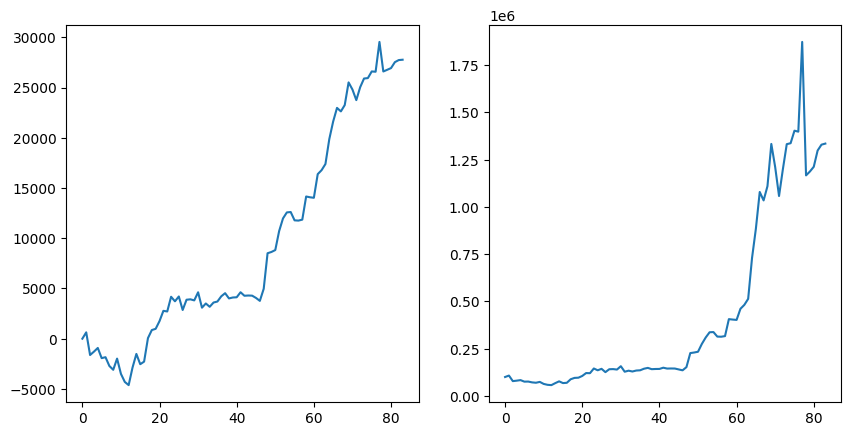

acc = 0.6626506024096386, pips = 27769.0
total_win = 47249.0, total_lose = -19480.0
rr = 2.425513347022587, ev = 0.48089606887508973
mean draw down = -1297.25, min draw down = -5253.0
total plus pip = 19267.0, total minus_pip = 8502.0


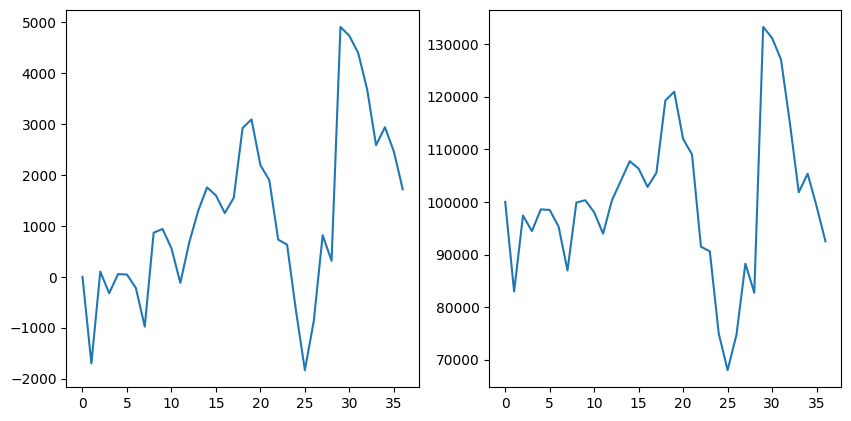

acc = 0.3888888888888889, pips = 1721.0
total_win = 15415.0, total_lose = -13694.0
rr = 1.1256754783116694, ev = 0.07680168119046457
mean draw down = -2077.0, min draw down = -4926.0
total plus pip = 238.0, total minus_pip = 1483.0


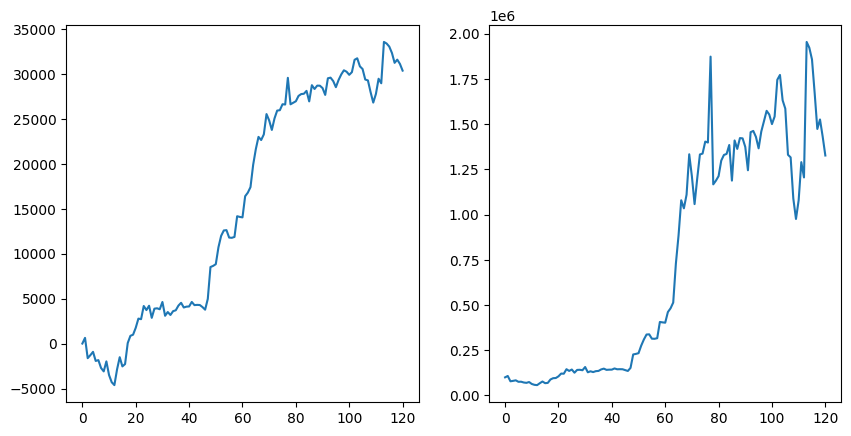

acc = 0.5833333333333334, pips = 30341.0
total_win = 62985.0, total_lose = -32644.0
rr = 1.9294510476657272, ev = 0.3872712698607199
mean draw down = -1577.875, min draw down = -5253.0
total plus pip = 20035.0, total minus_pip = 10306.0


In [6]:
self.risk = 0.04

self.evolute(s, self.test_step[0] + 960 * 0, self.test_step[0] + 960 * 9)
self.evolute(s, self.test_step[0] + 960 * 9, self.test_step[0] + 960 * 12)
self.evolute(s, self.test_step[0] + 960 * 0, self.test_step[0] + 960 * 12)